<div align="center">
    
# Real Estate Pricing Regression Model

## Moringa x Flatiron Phase 2 Project


> Author: [Mithamo Beth](https://github.com/Mythamor) 
</div>

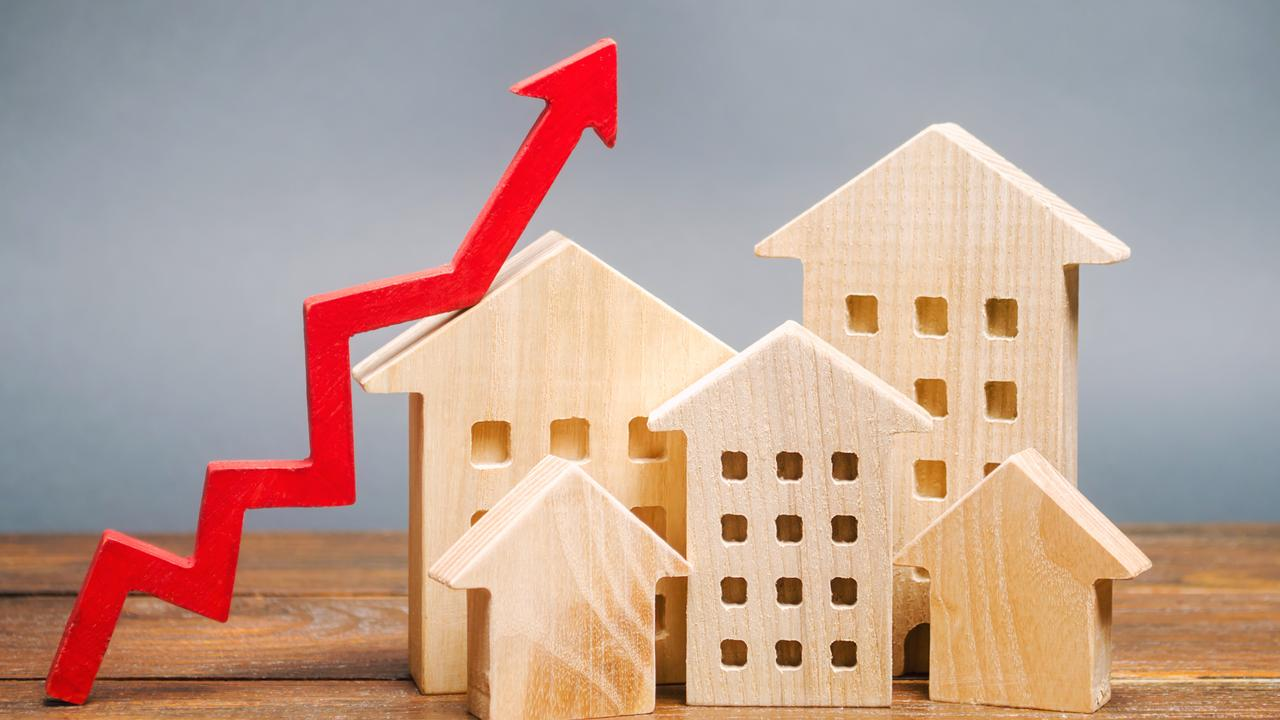

## Business Understanding

### Overview
In this project, we will leverage Multiple Linear Regression modeling to analyze house sales in a northwestern county. By utilizing both the Stats Model and Scikit Learn libraries, we aim to perform a comprehensive linear regression analysis with iterative model development.

### Business Problem
Our client is a real estate agency specializing in assisting homeowners with buying and selling properties. The agency seeks guidance on how home renovations can potentially enhance the estimated value of homes and the magnitude of such improvements.

### Objectives
1. Gain valuable data insights to enhance the agency's advisory services to homeowners.

2. Develop a predictive pricing model that empowers the agency to make accurate property predictions based on the most relevant features.

3. Identify the key features that significantly impact home renovations and their associated value increases.

## Data Understanding
This project uses the King County, Washington House Sales dataset, which can be found in [kc_house_data.csv](data/kc_house_data.csv) in the data folder in this repo. The description of the column names can be found in [column_names.md](data/column_names.md)  in the same folder.

The property dataset has the following features which we will explore:
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Load and Clean Data

In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Keep the relevant columns and drop the rest
relevant_columns = [ 'id', # Unique identifier for a house
                    'price', # Prediction target
                    'bedrooms', # Number of Bedrooms
                    'bathrooms', # Number-of bathrooms
                    'sqft_living', # Square footage of the home
                    'sqft_lot', # Square footage of the lot
                    'floors', # Total floors (levels) in house
                    'waterfront', # House which has a view to a waterfront
                    'condition', # How good the condition is ( Overall )
                    'grade', # Overall grade given to the housing unit, based on King County grading system
                    'yr_built', # Built Year
                    'yr_renovated', # Year when house was renovated\
                    'sqft_basement', # square footage of the basement'
                    'lat', # Latitude coordinate
                    'long', # Longitude coordinate
                   ]
                    
df = df[relevant_columns]

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,sqft_basement,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0,0.0,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,400.0,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN,0.0,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,910.0,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,0.0,47.6168,-122.045


In [4]:
# Investigate the dataset and check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   17755 non-null  float64
 12  sqft_basement  21597 non-null  object 
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 2.5+ MB


In [5]:
# Differentiate between numerical and categorical features
feature_count = df.nunique()
numerical_features = feature_count[feature_count > 20]
print(numerical_features)
print("-----------------------------------------------------\n")

# Categorical features
categorical_features = feature_count[feature_count < 20]
print(categorical_features)
print("-----------------------------------------------------\n")

id               21420
price             3622
bathrooms           29
sqft_living       1034
sqft_lot          9776
yr_built           116
yr_renovated        70
sqft_basement      304
lat               5033
long               751
dtype: int64
-----------------------------------------------------

bedrooms      12
floors         6
waterfront     2
condition      5
grade         11
dtype: int64
-----------------------------------------------------



### Check for null values

In [6]:
# Check for null values in the relevant columns
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
yr_built            0
yr_renovated     3842
sqft_basement       0
lat                 0
long                0
dtype: int64

> The waterfront, yr_renovated and view are the only columns with null values. Let's investigate them more.

In [7]:
# Investigate the null values in the waterfront column
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
# Check for the non boolean values
df.loc[~df['waterfront'].isin([0,1])].head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,sqft_basement,lat,long
0,7129300520,221900.0,3,1.0,1180,5650,1.0,NaN,3,7,1955,0.0,0.0,47.5112,-122.257
10,1736800520,662500.0,3,2.5,3560,9796,1.0,NaN,3,8,1965,0.0,1700.0,47.6007,-122.145
23,8091400200,252700.0,2,1.5,1070,9643,1.0,NaN,3,7,1985,NaN,0.0,47.3533,-122.166
40,5547700270,625000.0,4,2.5,2570,5520,2.0,NaN,3,9,2000,NaN,0.0,47.6145,-122.027
55,9822700295,885000.0,4,2.5,2830,5000,2.0,NaN,3,9,1995,0.0,0.0,47.6597,-122.290


In [9]:
# Houses with the NAN values don't have a waterfront
# Fill the null values with zero
df.loc[:, 'waterfront'] = df['waterfront'].fillna(0)

# Change column data type to bool 
df.loc[:, 'waterfront'] = df['waterfront'].astype(bool)
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
yr_built            0
yr_renovated     3842
sqft_basement       0
lat                 0
long                0
dtype: int64

In [10]:
# Investigate the yr_renovated column
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [11]:
# More than 75% of the houses have not been renovated
# This feature will not contribute to any reliable analysis
# Drop the feature
df.yr_renovated.value_counts().nlargest(10)

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
2000.0       29
2005.0       29
2004.0       22
1990.0       22
2009.0       21
Name: yr_renovated, dtype: int64

In [12]:
# Create a new column for renovation status and assign default value as 'Not Renovated'
df['renovated'] = False

# Update the renovation status based on the conditions
df.loc[(df['yr_renovated'].notnull()) & (df['yr_renovated'] != 0), 'renovated'] = True

# Check the renovation value counts
df['renovated'].value_counts(normalize=True)

False    0.965551
True     0.034449
Name: renovated, dtype: float64

In [13]:
print("Only 3% of the houses have been renovated")

Only 3% of the houses have been renovated


In [14]:
# Investigate the 'sqft_basement' column
print(df.sqft_basement.describe())

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object


In [15]:
# Make transformations
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)

# Change data type of 'sqft_basement' column to int
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.sqft_basement.describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [16]:
# Fill null values with 0
df['sqft_basement'] = df['sqft_basement'].fillna(0)

# Check for null values
df.sqft_basement.isna().sum()

0

In [17]:
# Create a new column for the boolean representation of basement presence
df['has_basement'] = df['sqft_basement'] != 0

# Check the unique values in the new column
print(df['has_basement'].unique())

# Check the renovation value counts
df['has_basement'].value_counts(normalize=True)

[False  True]


False    0.6149
True     0.3851
Name: has_basement, dtype: float64

In [18]:
# Drop the 'yr_renovated column' and 'sqft_basement' columns
df = df.drop(['yr_renovated', 'sqft_basement'], axis=1)

In [19]:
# Check the value_counts for columns that may be categorical
for col in df[['waterfront','condition', 'grade','floors','bedrooms','bathrooms','renovated']]:
    print(col)
    print(df[col].value_counts())
    print("------------------------------------------\n")

waterfront
False    21451
True       146
Name: waterfront, dtype: int64
------------------------------------------

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64
------------------------------------------

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64
------------------------------------------

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64
------------------------------------------

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
------------------------------------------

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100

In [20]:
# Statistical measures of the housing dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,47.777600,-121.315000


In [21]:
print(f"The average price of a house is {df.price.mean()}. The maximum value registered is {df.price.max()}, with at least \
75% of the dataset having a value of {np.quantile(df.price, 0.75)}")

The average price of a house is 540296.5735055795. The maximum value registered is 7700000.0, with at least 75% of the dataset having a value of 645000.0


In [22]:
"""
import sweetviz as sv
report = sv.analyze(df)
report.show_html("./report.html")
"""

'\nimport sweetviz as sv\nreport = sv.analyze(df)\nreport.show_html("./report.html")\n'

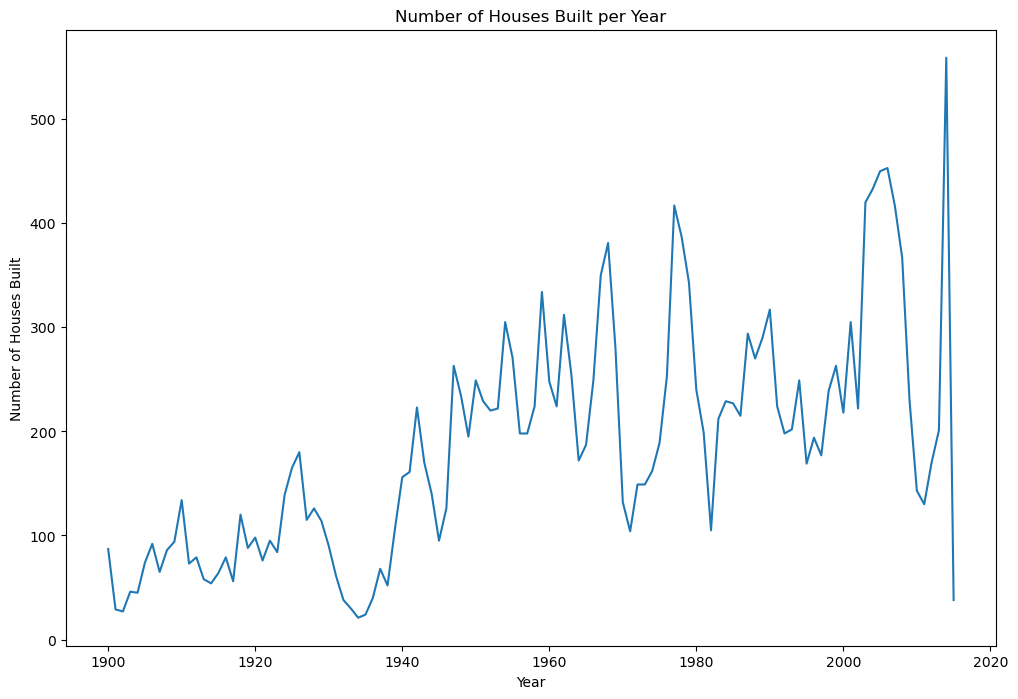

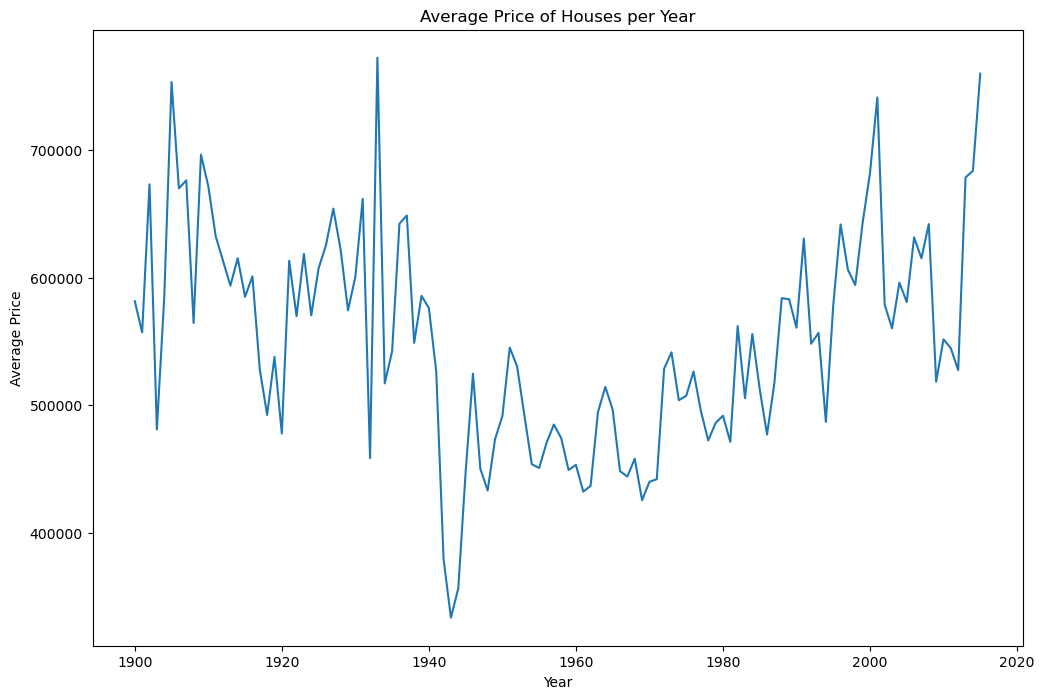

In [23]:
#Time_Series Analysis

# Assuming 'yr_built' represents the year the house was built

# Count the number of houses built each year
house_count_per_year = df['yr_built'].value_counts().sort_index()

# Plot the number of houses built per year
plt.figure(figsize=(12, 8))
plt.plot(house_count_per_year.index, house_count_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Houses Built')
plt.title('Number of Houses Built per Year')
plt.show()

# Calculate the average price per year
average_price_per_year = df.groupby('yr_built')['price'].mean()

# Plot the average price per year
plt.figure(figsize=(12, 8))
plt.plot(average_price_per_year.index, average_price_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Houses per Year')
plt.show()


In [24]:
"The average number of houses built has had a steady increase over the years, with some seasonality."

'The average number of houses built has had a steady increase over the years, with some seasonality.'

In [25]:
# Calculate the year with the highest number of houses built
highest_count_year = house_count_per_year.idxmax()
print("Year with the highest build count:", highest_count_year)

highest_count = house_count_per_year.loc[highest_count_year]
print("Highest build count:", highest_count)

print("--------------------------------------------------------")
# Calculate the year with the lowest average price, and by how much
lowest_count_year = house_count_per_year.idxmin()
print("Year with the lowest build count:", lowest_count_year)

lowest_count = house_count_per_year.loc[lowest_count_year]
print("Lowest build count:", lowest_count)

Year with the highest build count: 2014
Highest build count: 559
--------------------------------------------------------
Year with the lowest build count: 1934
Lowest build count: 21


In [26]:
# Calculate the year with the highest average price, and by how much
highest_avg_year = average_price_per_year.idxmax()
print("Year with the highest average price:", highest_avg_year)

highest_avg_price = average_price_per_year.loc[highest_avg_year]
print("Highest average price:", highest_avg_price)

print("--------------------------------------------------------")
# Calculate the year with the lowest average price, and by how much
lowest_avg_year = average_price_per_year.idxmin()
print("Year with the lowest average price:", lowest_avg_year)

lowest_avg_price = average_price_per_year.loc[lowest_avg_year]
print("Lowest average price:", lowest_avg_price)

Year with the highest average price: 1933
Highest average price: 772483.3333333334
--------------------------------------------------------
Year with the lowest average price: 1943
Lowest average price: 333347.0


## Feature Engineering

In [27]:
# Get exact location from latitude and longitude
from geopy.geocoders import Nominatim
import pickle
import time

In [28]:
# view an example 
#geolocator.reverse("47.5112"+","+"-122.257").raw

In [29]:
def location(cord):
    # Initialize the geolocator
    geolocator = Nominatim(user_agent= 'geoapiExercises')
    
    # Extract longitude and latitude
    Latitude = str(cord[0])
    Longitude = str(cord[1])
    
    location = geolocator.reverse(Latitude+","+Longitude).raw['address']
    
    # handlemissing values
    if location.get('road') is None:
        location['road'] = None 
    if location.get('neighbourhood') is None:
        location['neighbourhood'] = None
    if location.get('city') is None:
        location['city'] = None
    
    loc_update['road'].append(location['road'])
    loc_update['neighbourhood'].append(location['neighbourhood'])
    loc_update['city'].append(location['city'])
    
    

In [ ]:
"""
Check if the 'loc_update.pickle' file already exists
try:
    with open("loc_update.pickle", "rb") as file:
        loc_update = pickle.load(file)
except FileNotFoundError:
    # If the file does not exist, create an empty dictionary
    loc_update = {
        "road": [],
        "neighbourhood": [],
        "city": []
    }

def location(cord):
    geolocator = Nominatim(user_agent='geoapiExercises')

    Latitude = str(cord[0])
    Longitude = str(cord[1])

    # Check if the location for this coordinate is already in the loc_update dictionary
    if Latitude in loc_update["road"] and Longitude in loc_update["road"]:
        return  # Skip if the location is already present

    try:
        location = geolocator.reverse(Latitude + "," + Longitude).raw['address']
    except geopy.exc.GeocoderUnavailable:
        # Handle the geocoder service being unavailable
        location = None

    # Rest of your code for processing location data
    # ...
     # handlemissing values
    if location.get('road') is None:
        location['road'] = None 
    if location.get('neighbourhood') is None:
        location['neighbourhood'] = None
    if location.get('city') is None:
        location['city'] = None
    
    loc_update['road'].append(location['road'])
    loc_update['neighbourhood'].append(location['neighbourhood'])
    loc_update['city'].append(location['city'])
    

    # Update the loc_update dictionary with the new location data
    #loc_update['road'].append(location.get('road', None))
    #loc_update['neighbourhood'].append(location.get('neighbourhood', None))
    #loc_update['city'].append(location.get('city', None))

# Loop through the DataFrame
for i, cord in enumerate(df.iloc[:, 13:-1].values):
    location(cord)

    if i % 100 == 0:
        print(i)

    # Add a delay of 1 second after every 500 iterations
    if i % 500 == 0 and i != 0:
        time.sleep(1)

# Pickle the data
with open("loc_update.pickle", 'wb') as file:
    pickle.dump(loc_update, file)
"""


In [31]:
# Load the pickled file
loc_update = pickle.load(open("./loc_update.pickle", "rb"))

In [32]:
# Investigate the dataframe
loc = pd.DataFrame(loc_update)
loc.sample(10)

,road,neighbourhood,city
2845,57th Place South,,
11997,52nd Place South,,
6238,211th Place Southeast,,
1373,Southeast Strouf Street,None,None
8316,128th Place Southeast,,
12790,16th Avenue Southwest,,Seattle
8224,Southwest 328th Street,Twin Lakes,
9709,28th Place South,Laurelwood,
13984,35th Avenue Southwest,Twin Lakes,
15360,Dibble Avenue Northwest,Crown Hill,Seattle


In [33]:
# Investigate the dataframe for null values
loc.info()
print("\n\nNull Values:")
print(loc.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20789 entries, 0 to 20788
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   road           20783 non-null  object
 1   neighbourhood  19481 non-null  object
 2   city           19473 non-null  object
dtypes: object(3)
memory usage: 487.4+ KB


Null Values:
road                6
neighbourhood    1308
city             1316
dtype: int64


In [34]:
# Trim the loc_df to match the length of df
num_rows_to_keep = len(df)
loc_df_trimmed = loc[:num_rows_to_keep]

# Concatenate the trimmed loc_df with the df DataFrame
df = pd.concat([df, loc_df_trimmed], axis=1)

# Display the concatenated DataFrame
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,renovated,has_basement,road,neighbourhood,city
0,7129300520,221900.0,3,1.00,1180,5650,1.0,False,3,7,1955,47.5112,-122.257,False,False,61st Avenue South,Rainier Beach,Seattle
1,6414100192,538000.0,3,2.25,2570,7242,2.0,False,3,7,1951,47.7210,-122.319,True,True,81st Avenue Northeast,None,None
2,5631500400,180000.0,2,1.00,770,10000,1.0,False,3,6,1933,47.7379,-122.233,False,False,Fauntleroy Way Southwest,Fauntleroy,Seattle
3,2487200875,604000.0,4,3.00,1960,5000,1.0,False,5,7,1965,47.5208,-122.393,False,True,221st Avenue Northeast,None,None
4,1954400510,510000.0,3,2.00,1680,8080,1.0,False,3,8,1987,47.6168,-122.045,False,False,South 330th Place,None,None
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,False,3,11,2001,47.6561,-122.005,False,True,14th Avenue South,Des Moines Creek,None
6,1321400060,257500.0,3,2.25,1715,6819,2.0,False,3,7,1995,47.3097,-122.327,False,False,Southwest 102nd Street,None,Seattle
7,2008000270,291850.0,3,1.50,1060,9711,1.0,False,3,7,1963,47.4095,-122.315,False,False,232nd Place Southeast,Katesridge,None
8,2414600126,229500.0,3,1.00,1780,7470,1.0,False,3,7,1960,47.5123,-122.337,False,True,146th Avenue Southeast,None,Bellevue
9,3793500160,323000.0,3,2.50,1890,6560,2.0,False,3,7,2003,47.3684,-122.031,False,False,Northeast 85th Street,Wedgwood,Seattle


In [35]:
# drop lat and long columns
df = df.drop(labels=["lat", "long"], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated,has_basement,road,neighbourhood,city
0,7129300520,221900.0,3,1.00,1180,5650,1.0,False,3,7,1955,False,False,61st Avenue South,Rainier Beach,Seattle
1,6414100192,538000.0,3,2.25,2570,7242,2.0,False,3,7,1951,True,True,81st Avenue Northeast,None,None
2,5631500400,180000.0,2,1.00,770,10000,1.0,False,3,6,1933,False,False,Fauntleroy Way Southwest,Fauntleroy,Seattle
3,2487200875,604000.0,4,3.00,1960,5000,1.0,False,5,7,1965,False,True,221st Avenue Northeast,None,None
4,1954400510,510000.0,3,2.00,1680,8080,1.0,False,3,8,1987,False,False,South 330th Place,None,None


In [36]:
# Impute the empty strings with NaN
df['road'] = df['road'].replace('', np.nan)
df['neighbourhood'] = df['neighbourhood'].replace('', np.nan)
df['city'] = df['city'].replace('', np.nan)

df[['road','neighbourhood','city']].isna().sum()

road               927
neighbourhood    13868
city             13628
dtype: int64

In [37]:
# Use classification algorithim to fill missing values
# Import classifier
from sklearn.linear_model import SGDClassifier

In [38]:
# Find missing indices
missing_idx = df[df['road'].isna()].index

# Independent params (train)
missing_road_X_train = df.loc[~df.index.isin(missing_idx), ['bedrooms', 'bathrooms','sqft_living','sqft_lot', \
                                                            'floors', 'waterfront','condition', 'grade', \
                                                            'yr_built', 'renovated', 'has_basement']].values

# Dependent param (train)
missing_road_y_train = df.loc[~df.index.isin(missing_idx), 'road'].values.ravel()

# Independent params (test)
missing_road_X_test = df.loc[df.index.isin(missing_idx), ['bedrooms', 'bathrooms','sqft_living','sqft_lot', \
                                                            'floors', 'waterfront','condition', 'grade', \
                                                            'yr_built', 'renovated', 'has_basement']].values

# Initialize the classifier
model_1 = SGDClassifier()

# Fit the classifier
model_1.fit(missing_road_X_train, missing_road_y_train)

# Predict missing road values
road_preds = model_1.predict(missing_road_X_test)

# Update the 'road' column with predicted values
for n, i in enumerate(missing_idx):
    df.loc[i, 'road'] = road_preds[n]


In [39]:
# Find missing indices for neighbourhood
missing_idx = df[df['neighbourhood'].isna()].index

# Independent params (train)
missing_neighbourhood_X_train = df.loc[~df.index.isin(missing_idx), ['bedrooms', 'bathrooms','sqft_living','sqft_lot', \
                                                            'floors', 'waterfront','condition', 'grade', \
                                                            'yr_built', 'renovated', 'has_basement']].values

# Dependent param (train)
missing_neighbourhood_y_train = df.loc[~df.index.isin(missing_idx), ['neighbourhood']].values.ravel()

# Independent params (test)
missing_neighbourhood_X_test = df.loc[df.index.isin(missing_idx), ['bedrooms', 'bathrooms','sqft_living','sqft_lot', \
                                                            'floors', 'waterfront','condition', 'grade', \
                                                            'yr_built', 'renovated', 'has_basement']].values


# Fit the model
model_1 = SGDClassifier()

model_1.fit(missing_neighbourhood_X_train, missing_neighbourhood_y_train)

neighbourhood_preds = model_1.predict(missing_neighbourhood_X_test)

# Make predictions
for n, i in enumerate(missing_idx):
    df.loc[i, 'neighbourhood'] = neighbourhood_preds[n]

In [40]:
# Find missing indices for city
missing_idx = df[df['city'].isna()].index

# Independent params (train)
missing_city_X_train = df.loc[~df.index.isin(missing_idx), ['bedrooms', 'bathrooms','sqft_living','sqft_lot', \
                                                            'floors', 'waterfront','condition', 'grade', \
                                                            'yr_built', 'renovated', 'has_basement']].values

# Dependent param (train)
missing_city_y_train = df.loc[~df.index.isin(missing_idx), ['city']].values.ravel()

# Independent params (test)
missing_city_X_test = df.loc[df.index.isin(missing_idx), ['bedrooms', 'bathrooms','sqft_living','sqft_lot', \
                                                            'floors', 'waterfront','condition', 'grade', \
                                                            'yr_built', 'renovated', 'has_basement']].values


# Fit the model
model_1 = SGDClassifier()

model_1.fit(missing_city_X_train, missing_city_y_train)

city_preds = model_1.predict(missing_city_X_test)

# Make predictions
for n, i in enumerate(missing_idx):
    df.loc[i, 'city'] = city_preds[n]

In [41]:
# Investigate the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  bool   
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  renovated      21597 non-null  bool   
 12  has_basement   21597 non-null  bool   
 13  road           21597 non-null  object 
 14  neighbourhood  21597 non-null  object 
 15  city           21597 non-null  object 
dtypes: bool(3), float64(3), int64(7), object(3)
memory usage: 2.2+ MB


In [42]:
# Print the statistics of the locations
print("Top roads by count\n", df.road.value_counts().head(5))
print()
print("Top neighbourhoods by count\n", df.neighbourhood.value_counts().head(5))
print()
print("Top cities by count\n", df.city.value_counts().head(5))

Top roads by count
 Southeast 192nd Place          610
132nd Avenue Northeast         255
35th Avenue Southwest           54
12th Avenue Southwest           51
California Avenue Southwest     46
Name: road, dtype: int64

Top neighbourhoods by count
 Crown Pointe Greens    10962
High Point              1814
Elk Run                 1275
Whittier Heights         157
Twin Lakes               143
Name: neighbourhood, dtype: int64

Top cities by count
 Seattle        18234
Bellevue        3350
Issaquah           5
Kent               4
Federal Way        1
Name: city, dtype: int64


In [43]:
# Check the number of unique values of each location feature
print("Total Unique Roads\n", df.road.nunique())
print()
print("Top Unique Neighbourhoods\n", df.neighbourhood.nunique())
print()
print("Top Unique Cities\n", df.city.nunique())

Total Unique Roads
 5048

Top Unique Neighbourhoods
 361

Top Unique Cities
 8


In [44]:
# Age of the property
current_year = 2023
df['age'] = current_year - df['yr_built']

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated,has_basement,road,neighbourhood,city,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,False,3,7,1955,False,False,61st Avenue South,Rainier Beach,Seattle,68
1,6414100192,538000.0,3,2.25,2570,7242,2.0,False,3,7,1951,True,True,81st Avenue Northeast,Crown Pointe Greens,Seattle,72
2,5631500400,180000.0,2,1.00,770,10000,1.0,False,3,6,1933,False,False,Fauntleroy Way Southwest,Fauntleroy,Seattle,90
3,2487200875,604000.0,4,3.00,1960,5000,1.0,False,5,7,1965,False,True,221st Avenue Northeast,Crown Pointe Greens,Seattle,58
4,1954400510,510000.0,3,2.00,1680,8080,1.0,False,3,8,1987,False,False,South 330th Place,Crown Pointe Greens,Seattle,36


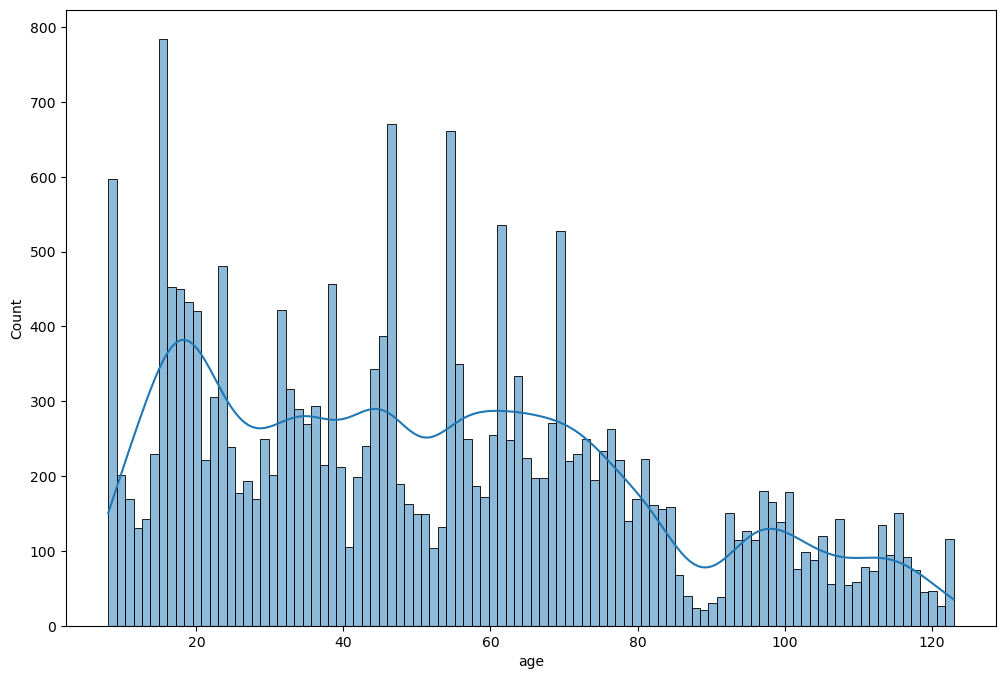

In [45]:
# Drop yr_built
df = df.drop('yr_built', axis=1)

# Plot a histogram to illustrate the distribution og the property ages
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='age', kde=True, bins=100)
plt.show();

In [46]:
# Describe the age stats
print(df['age'].describe())
print()
print(f"The oldest house is {df.age.max()} years old, with the newest house being {df.age.min()} years old.\
The average age of the house is {round(df.age.mean(),0)} years.")

count    21597.000000
mean        52.000324
std         29.375234
min          8.000000
25%         26.000000
50%         48.000000
75%         72.000000
max        123.000000
Name: age, dtype: float64

The oldest house is 123 years old, with the newest house being 8 years old.The average age of the house is 52.0 years.


In [47]:
# Create age groups with bins of 25 years each
bins = range(0, df['age'].max() + 26, 25)
grouped_ages = pd.cut(df['age'], bins=bins)

# Calculate the average price per age group
average_price_per_group = df.groupby(grouped_ages)['price'].mean()

# Print the average price per age group
average_price_per_group.sort_values(ascending=False)


age
(0, 25]       618797.679156
(100, 125]    598867.695753
(25, 50]      531435.052614
(75, 100]     529345.071044
(50, 75]      467594.735393
Name: price, dtype: float64

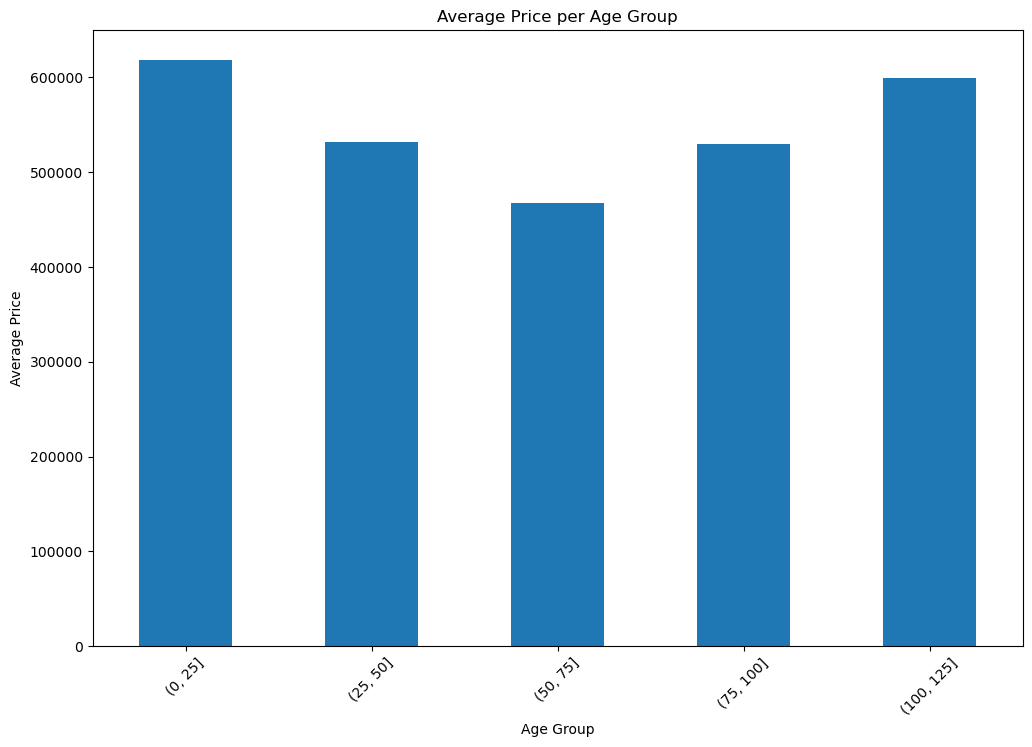

In [48]:
# Create a bar plot for the Age groups
plt.figure(figsize=(12, 8))
average_price_per_group.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Price')
plt.title('Average Price per Age Group')
plt.xticks(rotation=45)
plt.show()

> The houses with the highest average price per age group are between 0 to 25 years, closely followed by houses that are over 100 years old, with a difference of less than $10,000

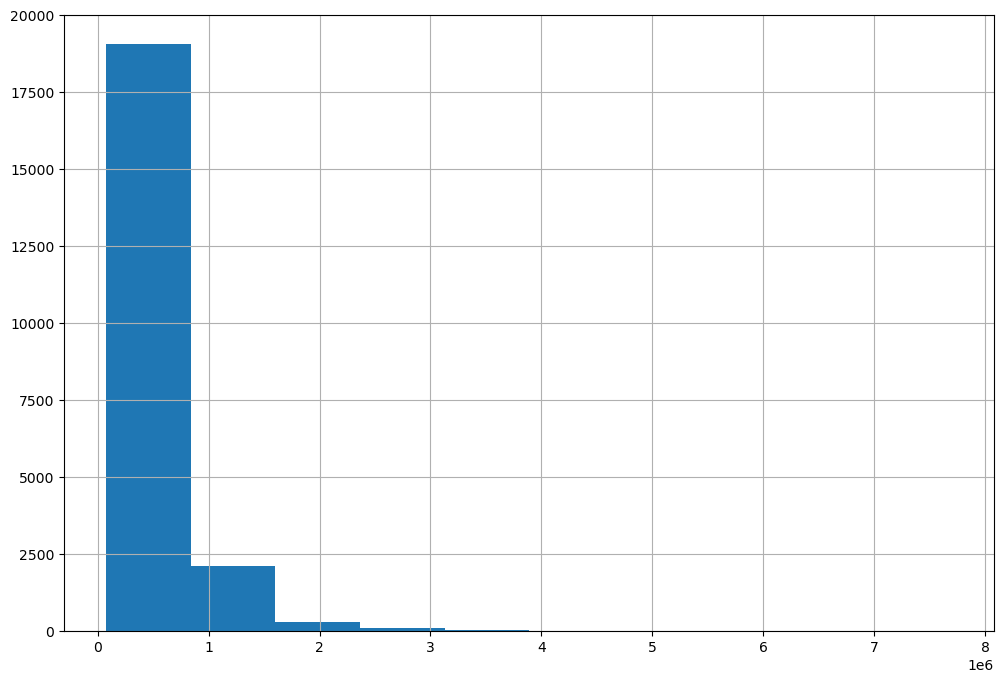

In [49]:
# Distibution of our predictor variable 'price'
plt.figure(figsize=(12, 8))
df['price'].hist();

In [50]:
"The price data is slightly skewed to the right."

'The price data is slightly skewed to the right.'

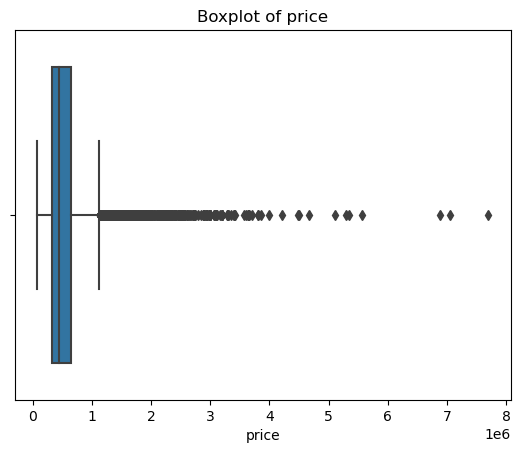

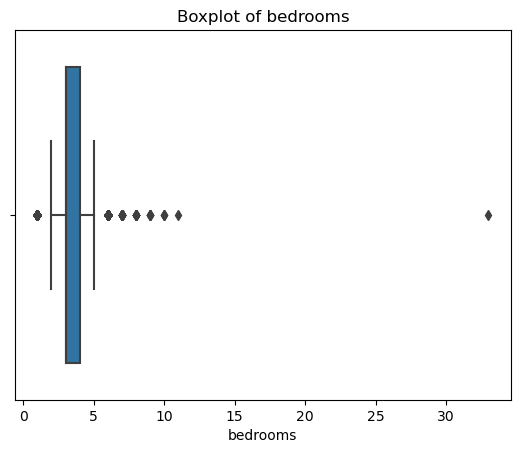

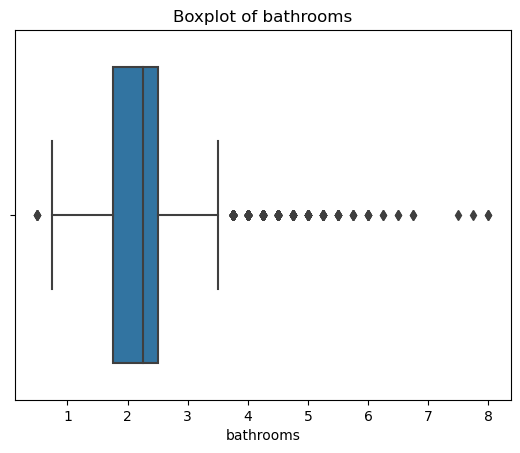

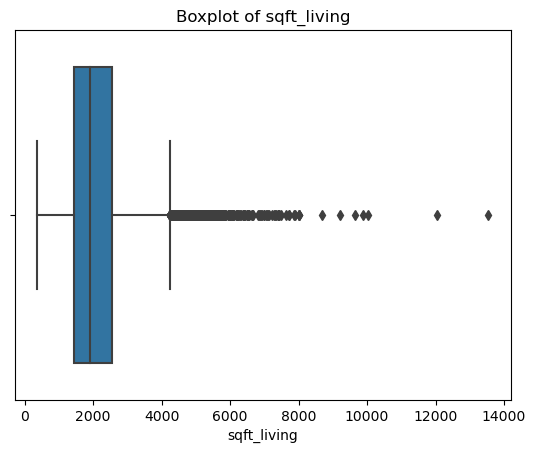

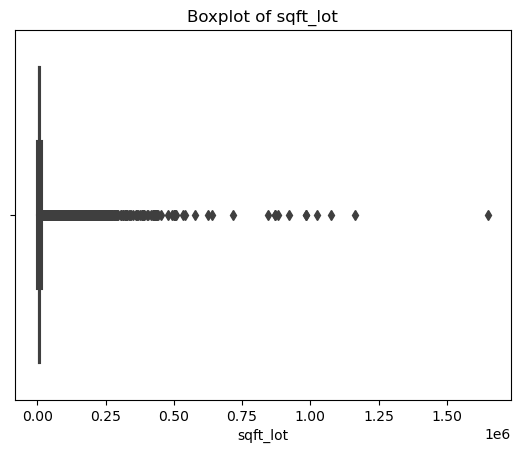

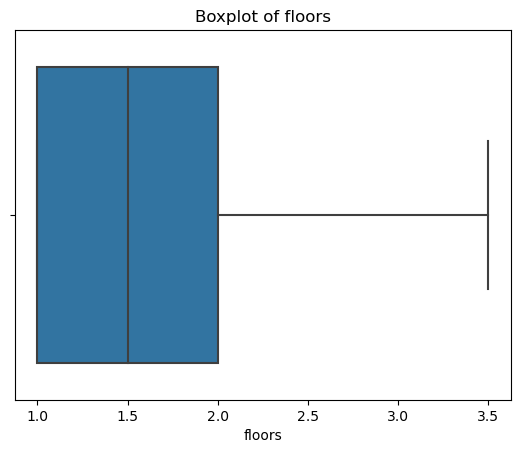

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

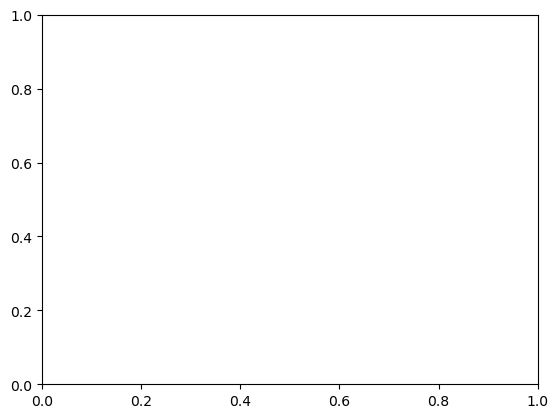

In [51]:
# Iterate over each column in the DataFrame
for col in df.columns:
    # Create a new figure for each boxplot
    if col != 'id':
        plt.figure()
    
        # Create a boxplot for the current column
        sns.boxplot(data=df, x=col)
    
        # Set a title for the boxplot
        plt.title(f'Boxplot of {col}')
    
        # Display the boxplot
        plt.show()

In [52]:
print("Most of the outliers are on the continuous variables, price, sqft_living and sqft_lot. We have however dropped most\
of the outliers. If we dropped anymore, we would lose important data.")

Most of the outliers are on the continuous variables, price, sqft_living and sqft_lot. We have however dropped mostof the outliers. If we dropped anymore, we would lose important data.


### Check for outliers

> The IQR method flags more than 30% of our dataset as outliers. We would lose too muh data. We will therefore resort to other methods of removing outliers like Robust Estimators

In [53]:
# Check for outliers using the Robust Estimators
outliers = pd.DataFrame()

excluded_columns = ['waterfront','renovated','has_basement','road','neighbourhood','city']

for column in df.columns:
    if column not in excluded_columns:

# Assuming 'data' is your dataset
        median = np.median(df[column])
        mad = np.median(np.abs(df[column] - median))

# Calculate lower and upper thresholds for outliers
        lower_threshold = median - (3 * mad)
        upper_threshold = median + (3 * mad)

# Flag outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
                  
        outliers = outliers.append(outliers)

print(outliers.shape)
print()
#calculate the percentage of the outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print("Percentage of outliers: {:.2f}%".format(percentage_outliers))

#drop outliers
df =df.drop(outliers.index, axis=0)

(616, 16)

Percentage of outliers: 2.85%


In [54]:
from sklearn.ensemble import IsolationForest

# Adjust the contamination parameter as per your requirement
clf = IsolationForest(contamination=0.10) 

# Exclude the 'waterfront' column from the input data
input_data = df.drop(['waterfront','renovated','has_basement','road','neighbourhood','city'], axis=1)

# Fit the model and predict outliers
outlier_labels = clf.fit_predict(input_data)

# Count the number of outliers
num_outliers = len(outlier_labels[outlier_labels == -1])

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / len(input_data)) * 100

print("Percentage of outliers: {:.2f}%".format(percentage_outliers))


Percentage of outliers: 10.00%


> The IsolationForest drops 10% of the dataset. This is reasonable range.

In [55]:
# Remove more variables in our input data
# Define the values to drop in each column
bedrooms_to_drop = [7, 8, 9, 10, 11, 33]
bathrooms_to_drop = [4.75, 5.50, 1.25, 6.00, 5.75, 0.50, 8.00, 6.25, 6.75, 6.50, 7.50, 7.75]
grade_to_drop = [3,12]
floors_to_drop = [3.5]
cities_to_drop = ['Pacific','Redmond', 'Auburn']

# Drop rows based on the values in 'bedrooms' and 'bathrooms' columns
df = df[~df['bedrooms'].isin(bedrooms_to_drop) & ~df['bathrooms'].isin(bathrooms_to_drop) &\
        ~df['grade'].isin(grade_to_drop) & ~df['floors'].isin(floors_to_drop)&\
        ~df['city'].isin(cities_to_drop)]
df.shape

(21089, 16)

## Categorical vs Continuous Variables

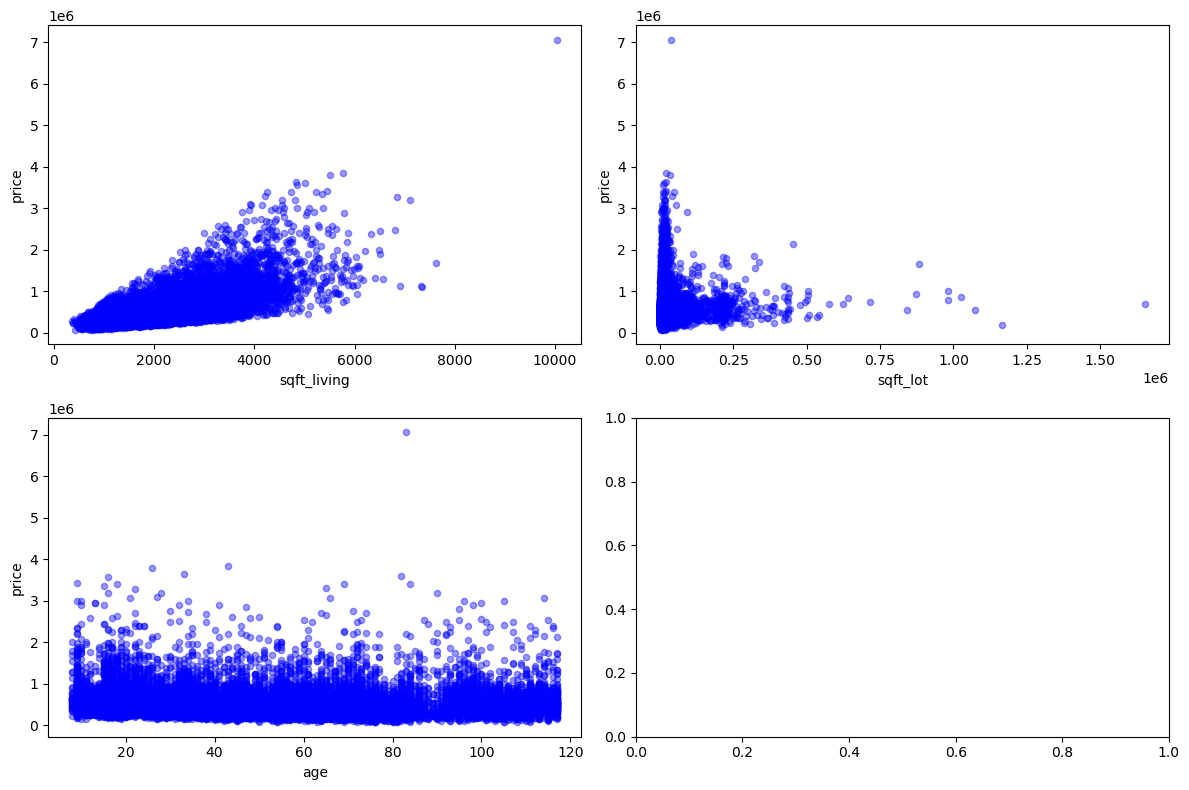

In [56]:
# Use our previous assumption of numerical vs categorical features for further analysis with plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plots for numerical features
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'age'], axes.flatten()):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

plt.tight_layout()
plt.show()

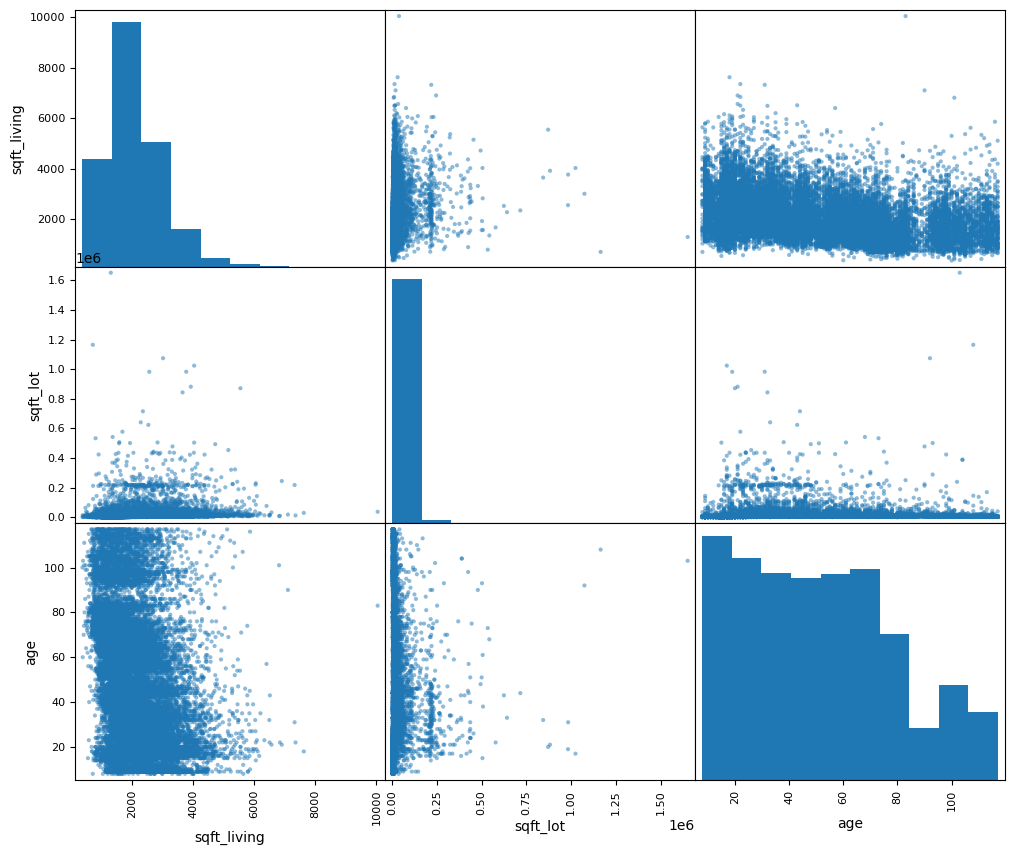

In [57]:
# Plot the distribution of the numerical data to check for normality
pd.plotting.scatter_matrix(df[['sqft_living', 'sqft_lot', 'age']], figsize=(12,10));

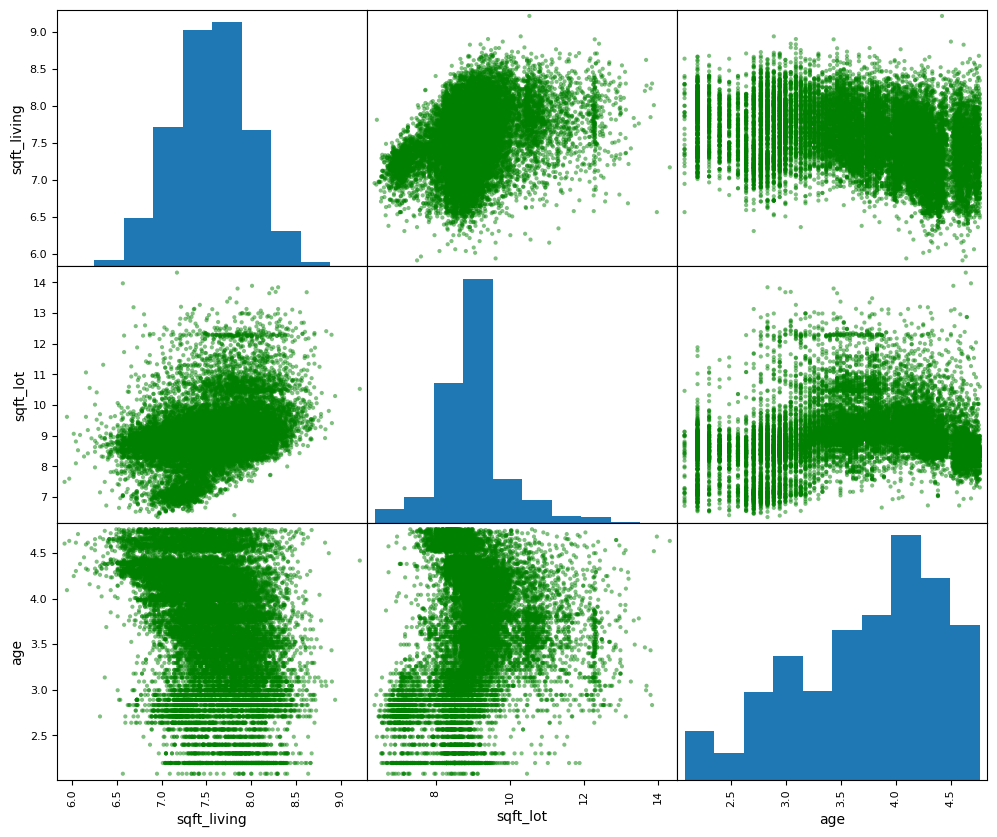

In [58]:
# Log transform the numerical data, for a more normal distribution
log_num_features = np.log(numerical_features)
pd.plotting.scatter_matrix(np.log(df[['sqft_living', 'sqft_lot', 'age']]), figsize=(12,10), color='g');

In [59]:
print("The log transformation has improved the continuous data normality")

The log transformation has improved the continuous data normality


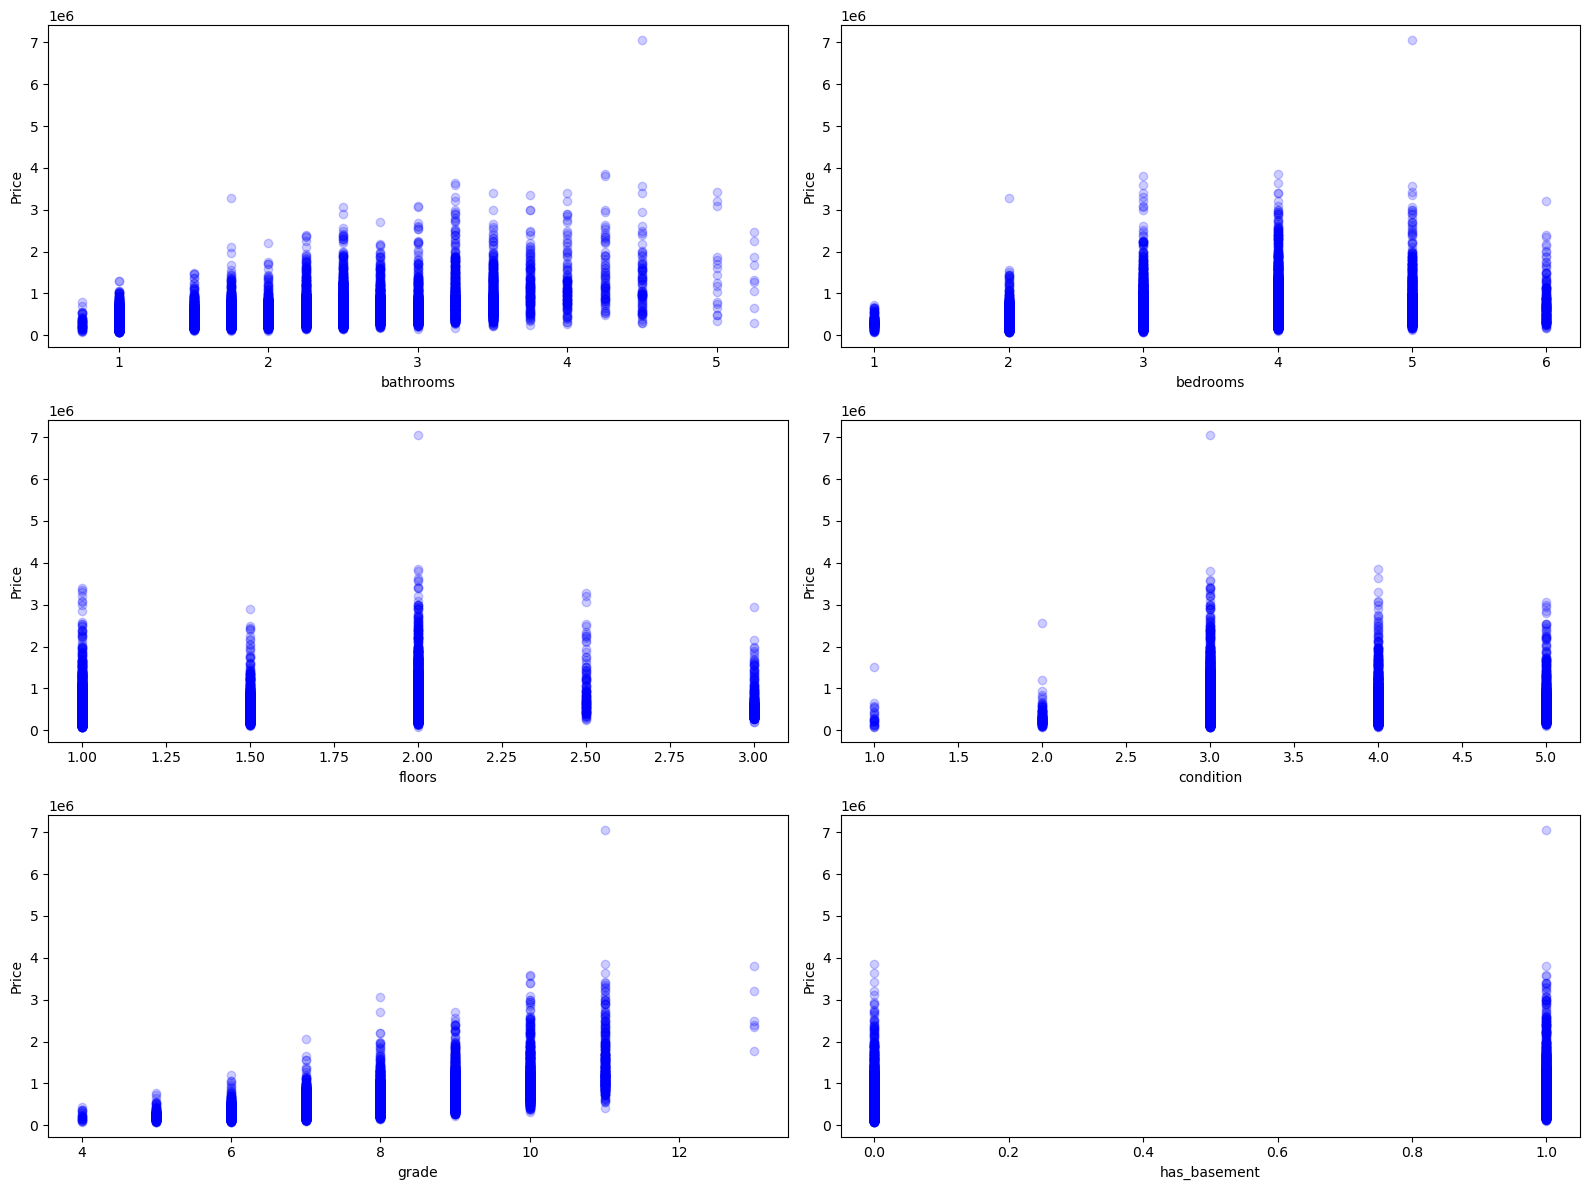

In [60]:
# Scatter plots for categorical data
scatterplot_data = df[['bathrooms','bedrooms', 'floors', 'condition', 'grade','has_basement']]

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 12))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//2][index%2]
    ax.scatter(df[col], df['price'], alpha=0.2, color='b')
    ax.set_xlabel(col)
    ax.set_ylabel("Price")


## Check for Multicollinearity of Features

In [61]:
# Check for collinearity amongst the features
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,renovated,has_basement,age
id,1.000000,-0.012452,0.003628,0.009787,-0.006930,-0.133399,0.020297,0.000961,-0.023211,0.013779,-0.012896,0.002211,-0.025959
price,-0.012452,1.000000,0.309597,0.500074,0.677270,0.080843,0.257291,0.250386,0.040677,0.659145,0.122913,0.179666,-0.055754
bedrooms,0.003628,0.309597,1.000000,0.520128,0.597582,0.032755,0.177560,-0.006127,0.027613,0.365884,0.011483,0.154165,-0.174977
bathrooms,0.009787,0.500074,0.520128,1.000000,0.739839,0.075714,0.511641,0.049671,-0.129253,0.654768,0.041998,0.152630,-0.527946
sqft_living,-0.006930,0.677270,0.597582,0.739839,1.000000,0.162218,0.354429,0.085217,-0.059544,0.751868,0.048855,0.197025,-0.329705
sqft_lot,-0.133399,0.080843,0.032755,0.075714,0.162218,1.000000,-0.008924,0.021633,-0.006919,0.102593,0.006466,-0.035668,-0.045152
floors,0.020297,0.257291,0.177560,0.511641,0.354429,-0.008924,1.000000,0.018806,-0.271279,0.461169,0.000954,-0.259644,-0.517112
waterfront,0.000961,0.250386,-0.006127,0.049671,0.085217,0.021633,0.018806,1.000000,0.016436,0.065024,0.076683,0.036808,0.032514
condition,-0.023211,0.040677,0.027613,-0.129253,-0.059544,-0.006919,-0.271279,0.016436,1.000000,-0.150223,-0.053852,0.132026,0.368097
grade,0.013779,0.659145,0.365884,0.654768,0.751868,0.102593,0.461169,0.065024,-0.150223,1.000000,0.012364,0.042490,-0.459134


In [62]:
"Grade, sqft_living and bathrooms have the highest correlation with our target variable price."

'Grade, sqft_living and bathrooms have the highest correlation with our target variable price.'

In [63]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

#show the pairs of correlation, with atleast 0.6
corr_df[(corr_df.cc>.6) & (corr_df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.751868
"(bathrooms, sqft_living)",0.739839
"(price, sqft_living)",0.677270
"(grade, price)",0.659145
"(grade, bathrooms)",0.654768


In [64]:
print("The enginered features have the highest correlation. We will therefore not use the engineered features, yo avoid multicollinearity.")

The enginered features have the highest correlation. We will therefore not use the engineered features, yo avoid multicollinearity.


## Preparing Data for Modeling

In [130]:
# split the data into the dependent and independent variables
from sklearn.model_selection import train_test_split

# split the data
y = df['price']
X = df.drop(['id','price'], axis=1)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

14762 6327 14762 6327


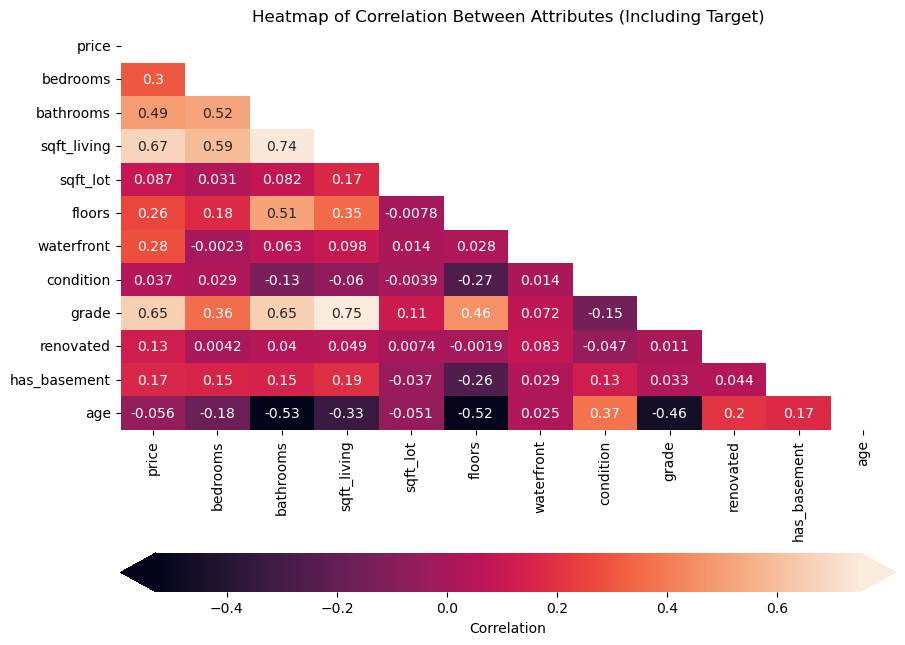

In [131]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

### Feature Scaling, Ohe and Log Transformation

In [132]:
# Transform the data
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler

#the bathrooms and floors contain floats, we therefore cannot use them as discrete values
continuous = ['sqft_living','sqft_lot','age','condition','grade']
categoricals = ['waterfront','bedrooms','floors', 'bathrooms','renovated','has_basement', 'city']

#rename log columns
log_columns = ['log_sqft_living','log_sqft_lot','log_age','log_condition','log_grade']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit transformers
log_transformer = log_transformer.fit(X_train[continuous])
scaled = scaler.fit_transform(log_transformer.transform(X_train[continuous]))
ohe = ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(scaled, columns=log_columns, index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), columns=ohe.get_feature_names_out(categoricals), index=X_train.index)
], axis=1)

# Check the new X_train dataframe
print(X_train.shape)
X_train.head()

(14762, 37)


,log_sqft_living,log_sqft_lot,log_age,log_condition,log_grade,waterfront_True,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,bathrooms_4.25,bathrooms_4.5,bathrooms_5.0,bathrooms_5.25,renovated_True,has_basement_True,city_Federal Way,city_Issaquah,city_Kent,city_Seattle
10005,0.967998,-0.125980,-1.132537,-0.614785,-0.541106,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5776,0.727252,3.332478,0.398583,2.236973,-0.541106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15461,-1.645856,-0.125825,1.488431,-0.614785,-0.541106,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7746,-0.039022,0.742723,1.092665,-0.614785,-0.541106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16611,1.566089,1.410107,-0.678310,-0.614785,1.917893,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
# Scaled X_test
test_scaled = scaler.transform(log_transformer.transform(X_test[continuous]))

# Transform test data
X_test = pd.concat([
    pd.DataFrame(test_scaled, columns=log_columns, index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), columns=ohe.get_feature_names_out(categoricals), index=X_test.index)
], axis=1)

# Check the new X_test dataframe
print(X_test.shape)
X_test.head()

(6327, 37)


,log_sqft_living,log_sqft_lot,log_age,log_condition,log_grade,waterfront_True,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,bathrooms_4.25,bathrooms_4.5,bathrooms_5.0,bathrooms_5.25,renovated_True,has_basement_True,city_Federal Way,city_Issaquah,city_Kent,city_Seattle
4029,0.217464,-0.230688,0.827113,-0.614785,-0.541106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
14040,-0.104335,-0.670625,-0.570153,0.991242,0.379490,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21400,-0.702426,-2.134792,-1.378520,-0.614785,0.379490,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17244,-0.685514,-0.532582,1.362810,0.991242,-1.603856,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20165,1.026677,-0.476034,-2.037401,-0.614785,1.191513,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Multiple Linear Regression in Statsmodels

In [69]:
# Import linear regression modeling libraries
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats

### Baseline Model

In [70]:
# build a simple baseline model with feature highest correlated with price
# sqft_living had the highest correlation, with price
ols_base_model = X_train[['log_sqft_living']]

In [71]:
# add a constant to your x values
ols_base_model = sm.add_constant(ols_base_model)

model = sm.OLS(y_train,ols_base_model )
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     8498.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:13:53   Log-Likelihood:            -2.0519e+05
No. Observations:               14762   AIC:                         4.104e+05
Df Residuals:                   14760   BIC:                         4.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             5.29e+05   2166.534    244.152      0.000    5.25e+05    5.33e+05
log_sqft_living  1.997e+05   2166.534     92.187      0.000    1.95e+05    2.04e+05
==============================================================================
Omnibus:                    11275.956   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559795.103
Skew:                           3.217   Prob(JB):                         0.00
Kurtosis:                      32.474   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
print("The model performed poorly with an R2 is 36.5%. We will iterate with more features, to check if we can improve our model.")

The model performed poorly with an R2 is 36.5%. We will iterate with more features, to check if we can improve our model.


### Stepwise Feature Selection

In [73]:
# stepwise feature selection
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = {}
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = min(new_pval.values())
        if best_pval < threshold_in:
            best_feature = min(new_pval, key=new_pval.get)
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [74]:
# resulting features
features = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(features)

Add  log_sqft_living                with p-value 0.0
Add  log_grade                      with p-value 0.0
Add  waterfront_True                with p-value 0.0
Add  log_age                        with p-value 5.54414e-303
Add  bedrooms_2                     with p-value 9.41458e-59
Add  bathrooms_2.5                  with p-value 6.52122e-53
Add  log_sqft_lot                   with p-value 2.96896e-47
Add  bathrooms_1.0                  with p-value 8.76501e-38
Add  bathrooms_3.75                 with p-value 5.89161e-35
Add  bathrooms_3.25                 with p-value 3.04723e-30
Add  bathrooms_4.0                  with p-value 2.4838e-30
Add  bathrooms_4.5                  with p-value 7.57423e-33
Add  bathrooms_3.5                  with p-value 6.02447e-32
Add  bathrooms_4.25                 with p-value 6.17279e-32
Add  bathrooms_5.0                  with p-value 3.34767e-23
Add  floors_3.0                     with p-value 1.01149e-13
Add  renovated_True                 with p-value

In [75]:
#add all features from the stepwise selection
stepwise_features = X_train[['city_Federal Way', 'log_grade', 'waterfront_True', 'log_age', \
                             'log_sqft_living', 'bedrooms_2', 'log_sqft_lot', 'bathrooms_4.5',\
                             'bathrooms_4.25', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_3.25',
                             'bathrooms_3.5', 'bathrooms_5.0', 'log_condition', 'bathrooms_1.0', 
                             'floors_3.0', 'renovated_True', 'floors_2.5', 'floors_1.5', 'bedrooms_6', 
                             'bedrooms_4', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_5.25', 'city_Seattle']]
# add a constant to your x values
ols_second_model = sm.add_constant(stepwise_features)

model = sm.OLS(y_train,ols_second_model)
result_2 = model.fit()

result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     852.3
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:14:07   Log-Likelihood:            -2.0177e+05
No. Observations:               14762   AIC:                         4.036e+05
Df Residuals:                   14735   BIC:                         4.038e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.868e+05   5268.148     92.406      0.000    4.76e+05    4.97e+05
city_Federal Way  4.005e+04   2.09e+05      0.191      0.848    -3.7e+05     4.5e+05
log_grade         1.502e+05   2746.998     54.679      0.000    1.45e+05    1.56e+05
waterfront_True   8.209e+05   2.18e+04     37.642      0.000    7.78e+05    8.64e+05
log_age           7.837e+04   2445.466     32.048      0.000    7.36e+04    8.32e+04
log_sqft_living   1.149e+05   3377.376     34.035      0.000    1.08e+05    1.22e+05
bedrooms_2        7.053e+04   5976.418     11.802      0.000    5.88e+04    8.22e+04
log_sqft_lot     -2.271e+04   2069.728    -10.970      0.000   -2.68e+04   -1.86e+04
bathrooms_4.5     4.024e+05   2.59e+04     15.530      0.000    3.52e+05    4.53e+05
bathrooms_4.25    4.305e+05   3.39e+04     12.689      0.000    3.64e+05    4.97e+05
bathrooms_3.75    3.664e+05   2.07e+04     17.721      0.000    3.26e+05    4.07e+05
bathrooms_4.0      3.62e+05   2.42e+04     14.954      0.000    3.15e+05    4.09e+05
bathrooms_3.25    1.962e+05    1.1e+04     17.792      0.000    1.75e+05    2.18e+05
bathrooms_3.5     1.625e+05   1.02e+04     15.930      0.000    1.43e+05    1.83e+05
bathrooms_5.0     6.386e+05   5.85e+04     10.923      0.000    5.24e+05    7.53e+05
log_condition     1.472e+04   1904.409      7.730      0.000     1.1e+04    1.85e+04
bathrooms_1.0     5.694e+04   6012.039      9.471      0.000    4.52e+04    6.87e+04
floors_3.0        8.089e+04   1.14e+04      7.089      0.000    5.85e+04    1.03e+05
renovated_True    7.453e+04   9919.514      7.513      0.000    5.51e+04     9.4e+04
floors_2.5        1.052e+05   2.14e+04      4.918      0.000    6.33e+04    1.47e+05
floors_1.5        2.637e+04   6599.882      3.996      0.000    1.34e+04    3.93e+04
bedrooms_6       -1.156e+05    1.6e+04     -7.209      0.000   -1.47e+05   -8.42e+04
bedrooms_4       -1.415e+04   4133.158     -3.423      0.001   -2.23e+04   -6047.762
bathrooms_2.75     3.82e+04   7880.575      4.848      0.000    2.28e+04    5.37e+04
bathrooms_3.0     4.828e+04   9582.377      5.038      0.000    2.95e+04    6.71e+04
bathrooms_5.25    5.184e+05   7.93e+04      6.534      0.000    3.63e+05    6.74e+05
city_Seattle     -7788.0322   5247.653     -1.484      0.138   -1.81e+04    2498.023
==============================================================================
Omnibus:                     8984.344   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347277.002
Skew:                           2.333   Prob(JB):                         0.00
Kurtosis:                      26.299   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [77]:
"Once we added more features, the model's R2 improved from 36.5% to 60.1%. That is quite a significant change. The model is not \
great but it's better. We will keep making some tweaks until we improve it. "

"Once we added more features, the model's R2 improved from 36.5% to 60.1%. That is quite a significant change. The model is not great but it's better. We will keep making some tweaks until we improve it. "

### Interactions

> Let's explore interactions between the age and the grade of the house.  We're interested to see if the effect of age on the houe condition is different between older and newer houses.

### categorical vs continous interaction

In [78]:
# split the property ages, to below a century, and over a century
age_under_100 = df.loc[df['age'] < 100] 
age_over_100 = df.loc[df['age'] >= 100] 

# count the distribution
under_100_count = age_under_100['age'].count()
over_100_count =  age_over_100['age'].count()

print(under_100_count, over_100_count)

19612 1477


In [79]:
from sklearn.linear_model import LinearRegression
# Plot the interactions
plt.figure(figsize=(12,8))

regression_1 = LinearRegression()
regression_2 = LinearRegression()

grade_1 = age_under_100['grade'].values.reshape(-1, 1)
grade_2 = age_over_100['grade'].values.reshape(-1, 1)

regression_1 = regression_1.fit(grade_1, age_under_100['price'])
regression_2 = regression_2.fit(grade_2, age_over_100['price'])

# Make predictions using the testing set
pred_1 = regression_1.predict(grade_1)
pred_2 = regression_2.predict(grade_2)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
plt.show()

[194534.91766659]
[274279.454141]


<Figure size 1200x800 with 0 Axes>

> The coefficient for regression_1 (age_under_100) is approximately 149270.14364983, which suggests that, on average, for every one-unit increase in the grade, the price of houses in the age_under_100 subset is estimated to increase by around 149270.14. Similarly, the coefficient for regression_2 (age_over_100) is approximately 201248.76940703, indicating that, on average, for every one-unit increase in the grade, the price of houses in the age_over_100 subset is estimated to increase by around 201248.77.

> These coefficients provide information about the strength and direction of the relationship between the grade and price variables within each subset of data. A positive coefficient suggests a positive relationship, meaning that as the grade increases, the price tends to increase as well.

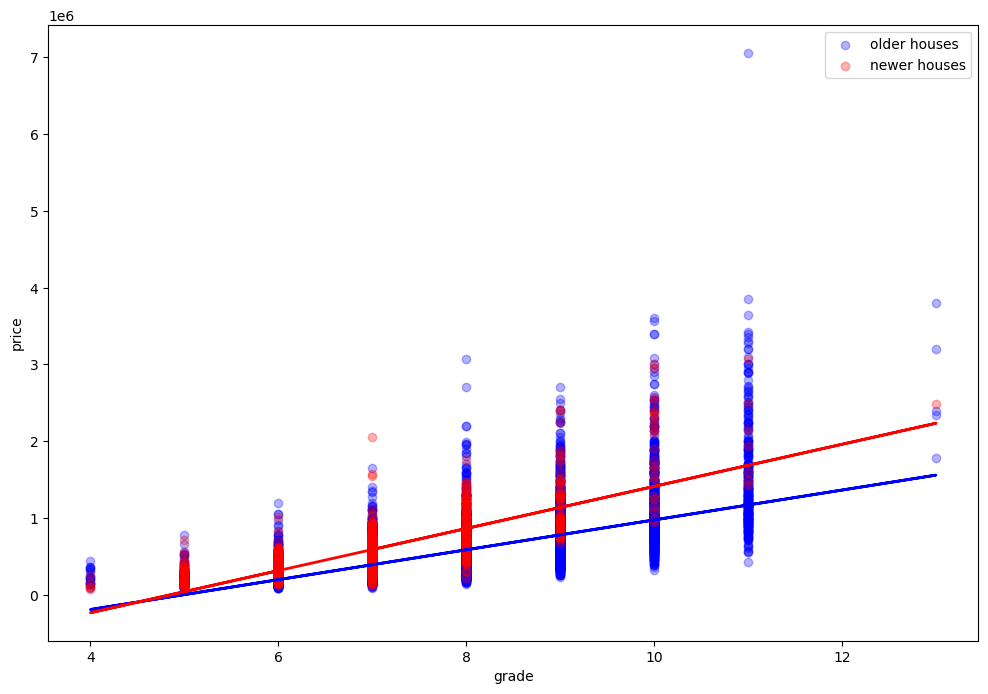

In [80]:
# Plot outputs
plt.figure(figsize=(12,8))

plt.scatter(grade_1, age_under_100['price'],  color='blue', alpha = 0.3, label = 'older houses')
plt.scatter(grade_2, age_over_100['price'],  color='red', alpha = 0.3, label = 'newer houses')

plt.plot(grade_1, pred_1,  color='blue', linewidth=2)
plt.plot(grade_2, pred_2,  color='red', linewidth=2)

plt.ylabel('price')
plt.xlabel('grade')
plt.legend();

### Continous vs Continuous interaction

In [81]:
#check the grade stats
df['grade'].describe()

count    21089.000000
mean         7.642231
std          1.131140
min          4.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [82]:
#sqft_living vs grade
less_grade_7 = df.loc[df['grade'] <= 7.0] 
over_grade_7 = df.loc[df['grade'] > 7.0] 


In [83]:
plt.figure(figsize=(12,8))

regression_1 = LinearRegression()
regression_2 = LinearRegression()

sqft_living_1 = less_grade_7['sqft_living'].values.reshape(-1, 1)
sqft_living_2 = over_grade_7['sqft_living'].values.reshape(-1, 1)

regression_1 = regression_1.fit(sqft_living_1 , less_grade_7['price'])
regression_2 = regression_2.fit(sqft_living_2 , over_grade_7['price'])

# Make predictions using the testing set
pred_1 = regression_1.predict(sqft_living_1 )
pred_2 = regression_2.predict(sqft_living_2 )

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)

[113.91078721]
[276.8500019]


<Figure size 1200x800 with 0 Axes>

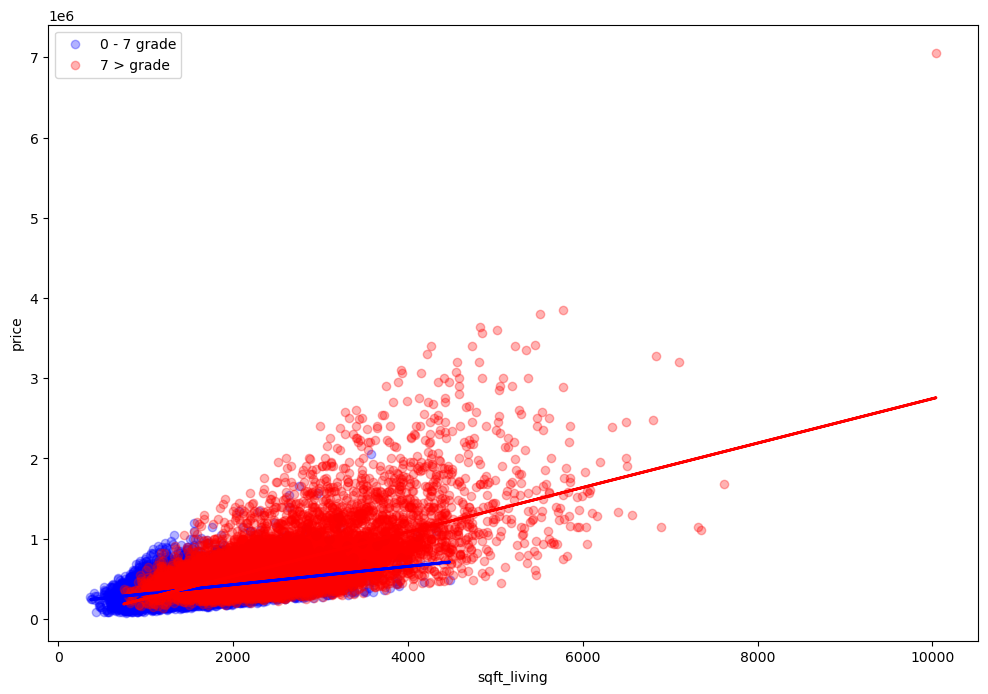

In [84]:
# Plot outputs
plt.figure(figsize=(12,8))

plt.scatter(sqft_living_1, less_grade_7['price'],  color='blue', alpha = 0.3, label = '0 - 7 grade')
plt.scatter(sqft_living_2, over_grade_7['price'],  color='red', alpha = 0.3, label = '7 > grade')

plt.plot(sqft_living_1, pred_1,  color='blue', linewidth=2)
plt.plot(sqft_living_2, pred_2,  color='red', linewidth=2)

plt.ylabel('price')
plt.xlabel('sqft_living')
plt.legend();

In [85]:
#create an interaction for X_train
X_interact = X_train.copy()
X_interact['sqft_grade'] = X_train['log_sqft_living'] * X_train['log_grade']  

#create an interaction for the X_test
X_interact_test = X_test.copy()
X_interact_test['sqft_grade'] = X_test['log_sqft_living'] * X_test['log_grade'] 
X_interact_test = sm.add_constant(X_interact_test)

X_interact = sm.add_constant(X_interact)
model = sm.OLS(y_train,X_interact)
result_3 = model.fit()
y_pred_3 = result_3.predict(X_interact_test)

result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     697.0
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:15:02   Log-Likelihood:            -2.0095e+05
No. Observations:               14762   AIC:                         4.020e+05
Df Residuals:                   14723   BIC:                         4.023e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.641e+05   3.46e+04     10.530      0.000    2.96e+05    4.32e+05
log_sqft_living    1.195e+05   3713.487     32.192      0.000    1.12e+05    1.27e+05
log_sqft_lot      -3.388e+04   2125.150    -15.943      0.000    -3.8e+04   -2.97e+04
log_age            7.256e+04   2668.354     27.194      0.000    6.73e+04    7.78e+04
log_condition      1.856e+04   1812.941     10.240      0.000     1.5e+04    2.21e+04
log_grade          1.369e+05   2683.598     50.998      0.000    1.32e+05    1.42e+05
waterfront_True    7.757e+05   2.07e+04     37.455      0.000    7.35e+05    8.16e+05
bedrooms_2         3.857e+04   1.87e+04      2.059      0.039    1855.237    7.53e+04
bedrooms_3         -365.7027   1.89e+04     -0.019      0.985   -3.74e+04    3.67e+04
bedrooms_4        -2.472e+04   1.93e+04     -1.278      0.201   -6.26e+04    1.32e+04
bedrooms_5        -1.474e+04   2.03e+04     -0.725      0.469   -5.46e+04    2.51e+04
bedrooms_6        -8.899e+04   2.46e+04     -3.620      0.000   -1.37e+05   -4.08e+04
floors_1.5         5.055e+04   6432.581      7.858      0.000    3.79e+04    6.32e+04
floors_2.0         1.797e+04   5571.204      3.226      0.001    7051.575    2.89e+04
floors_2.5         8.538e+04   2.07e+04      4.131      0.000    4.49e+04    1.26e+05
floors_3.0         1.127e+05   1.21e+04      9.304      0.000    8.89e+04    1.36e+05
bathrooms_1.0       8.85e+04   3.03e+04      2.920      0.004    2.91e+04    1.48e+05
bathrooms_1.5      8.487e+04   3.13e+04      2.713      0.007    2.35e+04    1.46e+05
bathrooms_1.75     9.692e+04   3.11e+04      3.115      0.002    3.59e+04    1.58e+05
bathrooms_2.0      9.675e+04   3.13e+04      3.092      0.002    3.54e+04    1.58e+05
bathrooms_2.25     9.324e+04   3.15e+04      2.958      0.003    3.15e+04    1.55e+05
bathrooms_2.5      7.741e+04   3.15e+04      2.460      0.014    1.57e+04    1.39e+05
bathrooms_2.75     1.088e+05    3.2e+04      3.396      0.001     4.6e+04    1.72e+05
bathrooms_3.0      1.094e+05   3.25e+04      3.371      0.001    4.58e+04    1.73e+05
bathrooms_3.25     1.939e+05   3.29e+04      5.885      0.000    1.29e+05    2.58e+05
bathrooms_3.5      1.412e+05   3.28e+04      4.305      0.000    7.69e+04    2.06e+05
bathrooms_3.75     3.086e+05   3.69e+04      8.361      0.000    2.36e+05    3.81e+05
bathrooms_4.0      2.695e+05   3.88e+04      6.947      0.000    1.93e+05    3.46e+05
bathrooms_4.25     3.212e+05   4.49e+04      7.162      0.000    2.33e+05    4.09e+05
bathrooms_4.5      2.924e+05   3.98e+04      7.349      0.000    2.14e+05     3.7e+05
bathrooms_5.0      4.775e+05   6.36e+04      7.511      0.000    3.53e+05    6.02e+05
bathrooms_5.25     3.663e+05   8.14e+04      4.501      0.000    2.07e+05    5.26e+05
renovated_True     8.633e+04   9458.327      9.127      0.000    6.78e+04

In [86]:
from sklearn.metrics import mean_squared_error
#compare the r2 of all the three models
print("Baseline_Model r2: ", result.rsquared)# only one feature 'sqft_living'
print()
print("Second_Model r2: ", result_2.rsquared)# stepwise_selected features
print()
print("Third_Model r2: ", result_3.rsquared)# all features
print("Third Model rmse:", np.sqrt(mean_squared_error(y_test, y_pred_3)))


#np.std of the mses

Baseline_Model r2:  0.36539324483269364

Second_Model r2:  0.600620478616789

Third_Model r2:  0.6427210347658303
Third Model rmse: 196264.20957333958


> The third_model with all features and an interaction is our best performing model, with an R2 of 64.2% and an rmse of 196264.20

## Multiple Linear Regression in Scikit

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import KFold, cross_val_score, cross_validate, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
# linear regression baseline model with the cross_val_score validation method

# instantiate the baseline model
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

baseline_scores = cross_validate(
                    estimator=baseline_model,
                    X=X_interact,
                    y=y_train,
                    scoring= "neg_mean_squared_error",
                    return_train_score=True,
                    cv=splitter)

print("Train score:     ", np.sqrt(-baseline_scores["train_score"].mean()))
print("Validation score:", np.sqrt(-baseline_scores["test_score"].mean()))


Train score:      197267.65423778023
Validation score: 199368.89045987203


In [89]:
"These is very little difference between the test and train errors. Therefore, this seems like a pretty good fit.\
The RMSE is higher than that of the statsmodel. We will therefore table this for now"

'These is very little difference between the test and train errors. Therefore, this seems like a pretty good fit.The RMSE is higher than that of the statsmodel. We will therefore table this for now'

In [90]:
# Use cross_val_score to estimate 
cross_val_score(baseline_model, X_interact, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=42)).mean()

0.6338794785598808

### Ridge and Lasso Regression

In [91]:
#instantiate and fit the ridge regression
ridge = Ridge(alpha=0.5)
ridge.fit(X_interact, y_train)

#instantiate and fit the lasso regression
lasso = Lasso(alpha=0.5)
lasso.fit(X_interact, y_train)

# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_interact)
y_h_ridge_test = ridge.predict(X_interact_test)

y_h_lasso_train = lasso.predict(X_interact)
y_h_lasso_test = lasso.predict(X_interact_test)

print("0.5 Alpha - Ridge Model")
print('Train MSE Ridge Model', mean_squared_error(y_train, y_h_ridge_train, squared= False))
print('Test MSE Ridge Model', mean_squared_error(y_test, y_h_ridge_test, squared= False))
print('Train R2 Ridge Model', lasso.score(X_interact, y_train))
print('Test R2 Ridge Model', lasso.score(X_interact_test, y_test))
print('\n')
print("0.5 Alpha - Lasso Model")
print('Train MSE Lasso Model', mean_squared_error(y_train, y_h_lasso_train, squared= False))
print('Test MSE Lasso Model', mean_squared_error(y_test, y_h_lasso_test, squared= False))
print('Train R2 Lasso Model', lasso.score(X_interact, y_train))
print('Test R2 Lasso Model', lasso.score(X_interact_test, y_test))

0.5 Alpha - Ridge Model
Train MSE Ridge Model 197505.90831891235
Test MSE Ridge Model 196235.07166602553
Train R2 Ridge Model 0.6427207189919393
Test R2 Ridge Model 0.6397977895399807


0.5 Alpha - Lasso Model
Train MSE Lasso Model 197496.9035614416
Test MSE Lasso Model 196262.46204686625
Train R2 Lasso Model 0.6427207189919393
Test R2 Lasso Model 0.6397977895399807


In [92]:
"The ridge and lasso regression have slightly higher scores than the statsmodel"

'The ridge and lasso regression have slightly higher scores than the statsmodel'

In [93]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)

Ridge parameter coefficients: [     0.         120102.46285243 -33962.20718091  72398.33242817
  18580.17039074 137181.92954431 770780.06909325  41646.79288886
   2826.68046519 -21553.04521676 -11286.42080461 -84574.54262213
  50499.59626295  18139.55394426  85179.08160512 112828.50744898
  58426.48820425  53805.83883431  65624.45582248  65390.70655171
  61417.08113282  45248.88628927  76567.78032409  77098.42496021
 161130.02063608 108312.46644685 274450.74723327 235225.1018858
 284731.61798868 257634.24525666 428046.84713695 310651.39313827
  86649.08565911  26986.34373455  58786.85577151 -18351.70130752
 -33842.78936533  -9853.98142007  63840.13916823]
Lasso parameter coefficients: [     0.         119579.55794612 -33891.88411121  72552.24537807
  18563.80297696 136889.95092879 775547.27390761  38918.42925025
      0.         -24352.40872184 -14342.38230644 -88544.280916
  50537.51101058  17971.07998631  85310.12562812 112655.45166499
  85559.75685902  81830.26026579  93866.06378823

### Scikitlearn Recursive Feature Elimination

In [94]:
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
fitted_selector = selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

print("\n")
print(fitted_selector.score(X_train_for_RFECV, y_train))

Was the column selected?
log_sqft_living: True
log_sqft_lot: True
log_age: True
log_condition: True
log_grade: True
waterfront_True: True
bedrooms_2: True
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bedrooms_6: True
floors_1.5: True
floors_2.0: True
floors_2.5: True
floors_3.0: True
bathrooms_1.0: True
bathrooms_1.5: True
bathrooms_1.75: True
bathrooms_2.0: True
bathrooms_2.25: True
bathrooms_2.5: True
bathrooms_2.75: True
bathrooms_3.0: True
bathrooms_3.25: False
bathrooms_3.5: True
bathrooms_3.75: True
bathrooms_4.0: True
bathrooms_4.25: True
bathrooms_4.5: True
bathrooms_5.0: True
bathrooms_5.25: True
renovated_True: True
has_basement_True: True
city_Federal Way: False
city_Issaquah: False
city_Kent: False
city_Seattle: True


0.6044178211847172


In [95]:
# Instantiate the model
second_model = LinearRegression()

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFE = StandardScaler().fit_transform(X_train)

# Fit the selector
selector = RFE(second_model)
fitted_selector = selector.fit(X_train_for_RFE, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
log_sqft_living: True
log_sqft_lot: True
log_age: True
log_condition: False
log_grade: True
waterfront_True: True
bedrooms_2: True
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bedrooms_6: True
floors_1.5: False
floors_2.0: False
floors_2.5: False
floors_3.0: False
bathrooms_1.0: True
bathrooms_1.5: True
bathrooms_1.75: True
bathrooms_2.0: True
bathrooms_2.25: True
bathrooms_2.5: True
bathrooms_2.75: True
bathrooms_3.0: True
bathrooms_3.25: False
bathrooms_3.5: False
bathrooms_3.75: False
bathrooms_4.0: False
bathrooms_4.25: False
bathrooms_4.5: False
bathrooms_5.0: False
bathrooms_5.25: False
renovated_True: False
has_basement_True: False
city_Federal Way: False
city_Issaquah: False
city_Kent: False
city_Seattle: False


In [96]:
# Ranking of the features, selected features are assigned rank 1
selector.ranking_

array([ 1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1, 11, 12, 10,  2,  1,  1,
        1,  1,  1,  1,  1,  1, 17, 14,  5,  8,  9,  6,  7, 13,  4, 15, 20,
       18, 19, 16])

In [97]:
# By calling .estimator_ on the RFE object, you can get access to 
# the parameter estimates through .coef_ and .intercept.
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[128147.72134728 -30093.14026142  87432.69643927 154741.09742906
  67247.49322309 -27621.89002439 -79941.58183795 -84318.90783166
 -43817.51005468 -27770.9165302  -61077.88935793 -55369.61019165
 -77359.41966326 -61240.20706539 -65380.95111748 -99190.77486893
 -42332.24892514 -32340.16861846]
528963.6436797181


In [98]:
# transform data on the selected features
X_train_selected = fitted_selector.transform(X_train)
X_test_selected = fitted_selector.transform(X_test)

RFE_model = second_model.fit(X_train_selected, y_train)
y_hat_train = RFE_model.predict(X_train_selected)
y_hat_test = RFE_model.predict(X_test_selected)

print("r2: ",RFE_model.score(X_test_selected, y_test))

# evaluate the metrics
train_mse = mean_squared_error(y_train, y_hat_train, squared=False)
test_mse = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Root_Mean Squared Error:', train_mse)
print('Test Root_Mean Squared Error:', test_mse)

r2:  0.579939209091481
Train Root_Mean Squared Error: 211376.9185470804
Test Root_Mean Squared Error: 211943.51305462254


In [99]:
#compare all the models
print("Current Model")
print("Train score:     ", second_model.score(X_train_selected, y_train))
print("Validation score:", second_model.score(X_test_selected, y_test))
print()
print("Baseline Model")
print("Train score:     ", np.sqrt(-baseline_scores["train_score"].mean()))
print("Validation score:", np.sqrt(-baseline_scores["test_score"].mean()))

Current Model
Train score:      0.5907371024016137
Validation score: 0.579939209091481

Baseline Model
Train score:      197267.65423778023
Validation score: 199368.89045987203


In [100]:
"The baseline model of the scikit learn series, performs better than the model with RFE/CV"

'The baseline model of the scikit learn series, performs better than the model with RFE/CV'

### Polynomial features

In [101]:
from sklearn.preprocessing import PolynomialFeatures
#from scipy.sparse import csr_matrix

#fit the polynomial
poly = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False)

# Convert X_train to sparse matrix if it is sparse
#X_train_sparse = csr_matrix(X_interact)

# Apply polynomial features to X_train
X_poly = poly.fit_transform(X_interact)

#fit the linear regression
reg_poly = LinearRegression().fit(X_poly, y_train)

# Transform the test data with polynomial features and interaction terms
# X_test_sparse = csr_matrix(X_test_interact)
X_poly_test = poly.transform(X_interact_test)

y_pred = reg_poly.predict(X_poly_test)

print("X_interact")
print("Train root_mean_squared_error: ",mean_squared_error(y_train, reg_poly.predict(X_poly), squared=False))
print("Test root_mean_squared_error: ",mean_squared_error(y_test, reg_poly.predict(X_poly_test), squared=False))
print("Train r2: ",r2_score(y_train, reg_poly.predict(X_poly)))
print("Test r2: ",r2_score(y_test, reg_poly.predict(X_poly_test)))

X_interact
Train root_mean_squared_error:  197496.81628464893
Test root_mean_squared_error:  196264.20957333955
Train r2:  0.6427210347658303
Test r2:  0.6397913750102295


> The polynomial model performs very similarly to the statmodel, which was our best performing model

In [102]:
# instantiate and fit the ridge regression
ridge = Ridge(alpha=2.0)
ridge.fit(X_poly, y_train)

# instantiate and fit the lasso regression
lasso = LassoCV(max_iter=100000, cv=15)
lasso.fit(X_poly, y_train)

# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_poly)
y_h_ridge_test = ridge.predict(X_poly_test)

y_h_lasso_train = lasso.predict(X_poly)
y_h_lasso_test = lasso.predict(X_poly_test)

print("2.0 Alpha - Ridge Model")
print('Train Error Ridge Model', mean_squared_error(y_train, y_h_ridge_train, squared= False))
print('Test Error Ridge Model', mean_squared_error(y_test, y_h_ridge_test, squared= False))
print('Train R2 Ridge Model', lasso.score(X_poly, y_train))
print('Test R2 Ridge Model', lasso.score(X_poly_test, y_test))
print('\n')
print("2.0 Alpha - Lasso Model")
print('Train Error Lasso Model', mean_squared_error(y_train, y_h_lasso_train, squared= False))
print('Test Error Lasso Model', mean_squared_error(y_test, y_h_lasso_test, squared= False))
print('Train R2 Lasso Model', lasso.score(X_poly, y_train))
print('Test R2 Lasso Model', lasso.score(X_poly_test, y_test))
print('\n')

2.0 Alpha - Ridge Model
Train Error Ridge Model 197563.3637067191
Test Error Ridge Model 196190.29848685637
Train R2 Ridge Model 0.6407769292598453
Test R2 Ridge Model 0.6387565393679508


2.0 Alpha - Lasso Model
Train Error Lasso Model 198033.419033105
Test Error Lasso Model 196545.929003662
Train R2 Lasso Model 0.6407769292598453
Test R2 Lasso Model 0.6387565393679508




In [103]:
"The combination of poly and ridge/lasso does not perform any better to the previous models"

'The combination of poly and ridge/lasso does not perform any better to the previous models'

In [104]:
print('Polynomial Ridge Parameter Coefficients:', len(ridge.coef_[ridge.coef_ != 0]), 
      'non-zero coefficient(s) and', len(ridge.coef_[ridge.coef_ == 0]), 'zeroed-out coefficient(s)')
print('Polynomial Lasso Parameter Coefficients:',  len(lasso.coef_[lasso.coef_ != 0]), 
      'non-zero coefficient(s) and', len(lasso.coef_[lasso.coef_ == 0]), 'zeroed-out coefficient(s)')

print('Zeroed-out ridge params:', sum(abs(ridge.coef_) < 10**(-10)),
     'out of', len(ridge.coef_))

print('Zeroed-out lasso params:', sum(abs(lasso.coef_) < 10**(-10)),
     'out of', len(lasso.coef_))

Polynomial Ridge Parameter Coefficients: 38 non-zero coefficient(s) and 1 zeroed-out coefficient(s)
Polynomial Lasso Parameter Coefficients: 28 non-zero coefficient(s) and 11 zeroed-out coefficient(s)
Zeroed-out ridge params: 1 out of 39
Zeroed-out lasso params: 11 out of 39


In [ ]:
"""
def run_model(model, X_train, X_test, y_train, y_test, display=True):
    
    train_r2 = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    
    test_r2 = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    
    if (display):
        print('Training R^2:', train_r2)
        print('Training Root Mean Squared Error:', train_rmse)
        print('\n----------------\n')
        print('Testing R^2:', test_r2)
        print('Testing Root Mean Squared Error:', test_rmse)
        
    return test_r2, test_rmse
"""

### ElasticNet Regression (Combining L1 and L2 Regularization):

In [105]:
from sklearn.linear_model import ElasticNet

# Assuming X and y are your feature and target variables
alpha = 1.0  # Regularization strength (alpha = 0 means no regularization)
l1_ratio = 1.0  # Mixing parameter between L1 and L2 regularization (l1_ratio = 0: L2, l1_ratio = 1: L1)
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
model.fit(X_interact, y_train)
model.score(X_interact_test, y_test)

0.6398034903829797

### DecisonTrees and RandomForest Regressors

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [107]:
# Decision Tree Regressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_interact, y_train)

In [108]:
clf.score(X_interact, y_train)

0.9993813173304735

In [109]:
clf.score(X_interact_test, y_test)

0.4119508982820337

> The decision tree is clearly a terrible method, as it overfits to the training data, and thus performs poorly on the test data. We shall not consider this further

In [110]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)

In [111]:
# Score the training data
rf.score(X_train, y_train)

0.9555140131188756

In [112]:
# Score the test data
rf.score(X_test, y_test)

0.6909962486160589

In [113]:
# Score the model with RMSE
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 69689.60289159512
Test RMSE: 181779.92996089006


> THe Random Forest Regressor is our best performing model thus far. Although, it is overfitting to the training data,its R2, and RMSE are performing better than all our other models.

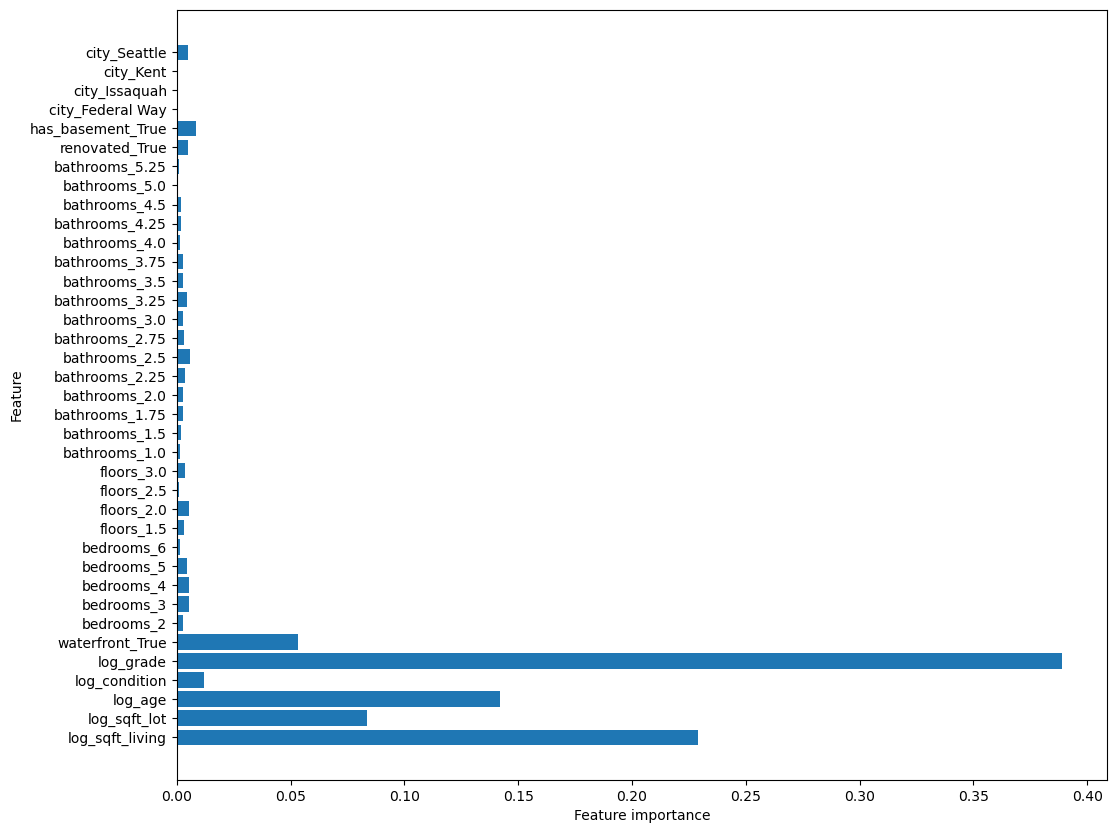

In [114]:
# feature importance based on regression tree regressor
rf.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf)

> The features with the most importance are:
   > * log_grade
   > * log_sqft_living
   > * log_age
   > * log_sqft_lot
   > * waterfront_True

### Bias Variance Trade-Off

> bias is when the model is off themark or target.
> variance is when the data has a wide spread or variability.
> get the std of the mses - to check the variance/ spread of data

In [115]:
def bias(y, y_hat):
     return np.mean(y_hat - y)

In [116]:
def variance(y_hat):
      return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2 

In [117]:
# Bias and variance for training set 
b = bias(y_train, y_pred_train) 
v = variance(y_pred_train) 
print(f'Train bias: {b} \nTrain variance: {v}')

Train bias: 670.0157971424388 
Train variance: 89947348685.9751


In [118]:
# Bias and variance for test set 
b = bias(y_test, y_pred_test) 
v = variance(y_pred_test) 
print(f'Test bias: {b} \nTest variance: {v}')

Test bias: -735.0302708460329 
Test variance: 77324244589.22308


### More experimentations on feature selection and hyperparameter tuning

In [119]:
# Tp interactions
from itertools import combinations
# Set up data structure
# (Here we are using a list of tuples, but you could use a dictionary,
# a list of lists, some other structure. Whatever makes sense to you.)
interactions = []

# Find combinations of columns and loop over them
column_pairs = list(combinations(X_train.columns, 2))
for (col1, col2) in column_pairs:
    # Make copies of X_train and X_test
    features_train = X_train.copy()
    features_test = X_test.copy()
    
    # Add interaction term to data
    features_train["interaction"] = features_train[col1] * features_train[col2]
    features_test["interaction"] = features_test[col1] * features_test[col2]
    
    # Find r-squared score (fit on training data, evaluate on test data)
    score = LinearRegression().fit(features_train, y_train).score(features_test, y_test)
    
    # Append to data structure
    interactions.append(((col1, col2), score))

# Sort and subset the data structure to find the top 7
top_7_interactions = sorted(interactions, key=lambda record: record[1], reverse=True)[:7]
print("Top 7 interactions:")
print(top_7_interactions)

Top 7 interactions:
[(('log_sqft_living', 'log_grade'), 0.6397913750102294), (('log_grade', 'bathrooms_1.0'), 0.604577149131986), (('log_grade', 'has_basement_True'), 0.6039770273111876), (('log_sqft_living', 'bathrooms_1.0'), 0.6010909647040783), (('log_grade', 'bathrooms_3.25'), 0.6003557537144112), (('log_sqft_living', 'has_basement_True'), 0.5998327392071401), (('log_grade', 'bathrooms_4.25'), 0.599208486770497)]


In [120]:
# Loop over top 7 interactions
for record in top_7_interactions:
    # Extract column names from data structure
    col1, col2 = record[0]
    
    # Construct new column name
    new_col_name = col1 + "_" + col2
    
    # Add new column to X_train and X_test
    X_train[new_col_name] = X_train[col1] * X_train[col2]
    X_test[new_col_name] = X_test[col1] * X_test[col2]
    
X_train

,log_sqft_living,log_sqft_lot,log_age,log_condition,log_grade,waterfront_True,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,city_Issaquah,city_Kent,city_Seattle,log_sqft_living_log_grade,log_grade_bathrooms_1.0,log_grade_has_basement_True,log_sqft_living_bathrooms_1.0,log_grade_bathrooms_3.25,log_sqft_living_has_basement_True,log_grade_bathrooms_4.25
10005,0.967998,-0.125980,-1.132537,-0.614785,-0.541106,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.523789,-0.000000,-0.541106,0.000000,-0.0,0.967998,-0.0
5776,0.727252,3.332478,0.398583,2.236973,-0.541106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.393520,-0.000000,-0.000000,0.000000,-0.0,0.000000,-0.0
15461,-1.645856,-0.125825,1.488431,-0.614785,-0.541106,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.890582,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0
7746,-0.039022,0.742723,1.092665,-0.614785,-0.541106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.021115,-0.000000,-0.541106,-0.000000,-0.0,-0.039022,-0.0
16611,1.566089,1.410107,-0.678310,-0.614785,1.917893,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,3.003590,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,-1.048592,-2.406453,-1.210173,-0.614785,0.379490,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.397931,0.000000,0.379490,-0.000000,0.0,-1.048592,0.0
12258,0.428119,0.079101,0.478968,-0.614785,-0.541106,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.231658,-0.000000,-0.541106,0.000000,-0.0,0.428119,-0.0
5531,-0.268711,-0.264907,1.528090,-0.614785,-0.541106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.145401,-0.541106,-0.000000,-0.268711,-0.0,-0.000000,-0.0
884,1.255613,0.845836,0.785066,-0.614785,-0.541106,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.679419,-0.000000,-0.541106,0.000000,-0.0,1.255613,-0.0


In [121]:
#Feature Selection
#First, test out RFE (documentation here) with several different n_features_to_select values. 
#For each value, print out the train and test  𝑅2score and how many features remain.
for n in [5, 10, 15, 20, 25]:
    rfe = RFE(LinearRegression(), n_features_to_select=n)
    X_rfe_train = rfe.fit_transform(X_interact, y_train)
    X_rfe_test = rfe.transform(X_interact_test)

    lr = LinearRegression()
    lr.fit(X_rfe_train, y_train)

    print("Train R^2:", lr.score(X_rfe_train, y_train))
    print("Test R^2: ", lr.score(X_rfe_test, y_test))
    print(f"Using {n} out of {X_train.shape[1]} features")
    print()

Train R^2: 0.12584243353140745
Test R^2:  0.09663240435402054
Using 5 out of 44 features

Train R^2: 0.4868246826814463
Test R^2:  0.47356564671873647
Using 10 out of 44 features

Train R^2: 0.5416298641630676
Test R^2:  0.53618041259238
Using 15 out of 44 features

Train R^2: 0.5513342112409698
Test R^2:  0.5421583202929932
Using 20 out of 44 features

Train R^2: 0.5909069680881481
Test R^2:  0.5775864037437509
Using 25 out of 44 features



In [122]:
# Lasso iterations based on alpha values
for alpha in [1, 10, 100, 1000, 10000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_interact, y_train)

    print("Train R^2:", lasso.score(X_interact, y_train))
    print("Test R^2: ", lasso.score(X_interact_test, y_test))
    print(f"Using {sum(abs(lasso.coef_) < 10**(-10))} out of {X_train.shape[1]} features")
    print("and an alpha of", alpha)
    print()

Train R^2: 0.6427198276984967
Test R^2:  0.6398034903829797
Using 1 out of 44 features
and an alpha of 1

Train R^2: 0.6426208183781423
Test R^2:  0.6398086044137441
Using 4 out of 44 features
and an alpha of 10

Train R^2: 0.6418802273847606
Test R^2:  0.6393369258251982
Using 7 out of 44 features
and an alpha of 100

Train R^2: 0.6331379770776555
Test R^2:  0.6354922970560504
Using 22 out of 44 features
and an alpha of 1000

Train R^2: 0.5736285266839721
Test R^2:  0.5970871643917938
Using 32 out of 44 features
and an alpha of 10000



### Plotting cross_validation comparisons

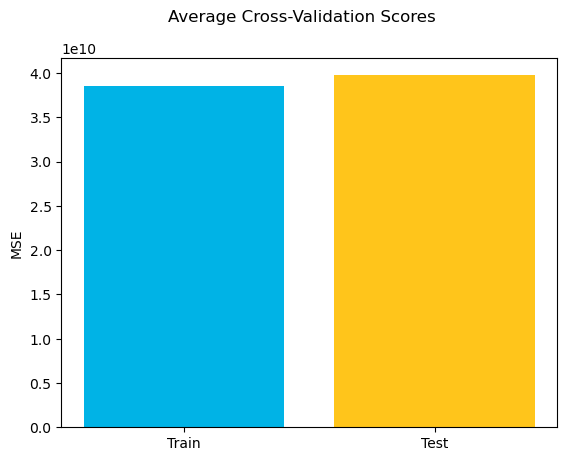

In [123]:
#visualize a bar plot of both the test and training data
linreg = LinearRegression()

cross_val_results = cross_validate(linreg, X_train, y_train, scoring="neg_mean_squared_error", return_train_score=True)

# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

fig, ax = plt.subplots()
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

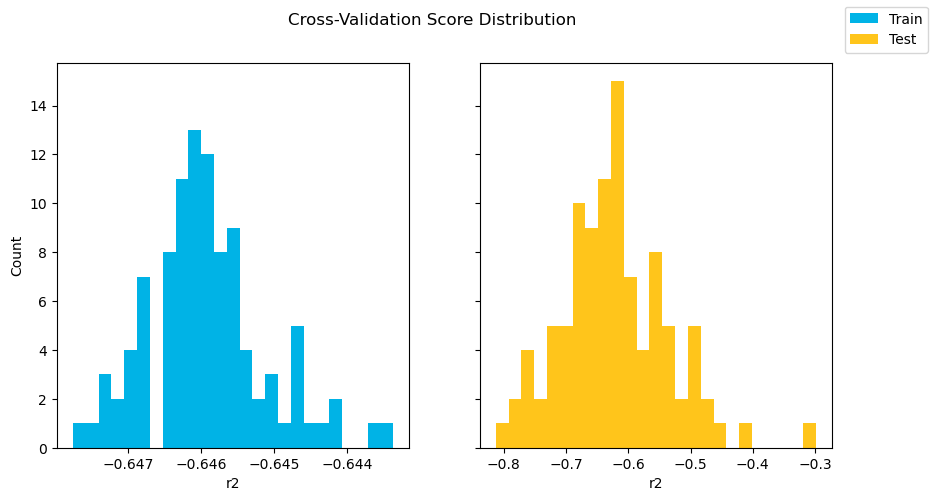

In [124]:
cross_val_results = cross_validate(linreg, X_train, y_train, cv=100, scoring="r2", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("r2")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("r2")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

In [125]:
# check the model accuracy when we use 100 folds
train_average = train_scores.mean()
test_average = test_scores.mean()

print("train_average: ", -train_average)
print()
print("test_average: ", -test_average)

train_average:  0.6459222268297792

test_average:  0.6228350873127395


### Interpret the random forest model

In [134]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print or visualize the feature importances
feature_importance_df

,Feature,Importance
0,log_grade,3.891591e-01
1,log_sqft_living,2.290371e-01
2,log_age,1.422135e-01
3,log_sqft_lot,8.362990e-02
4,waterfront_True,5.309068e-02
5,log_condition,1.209556e-02
6,has_basement_True,8.351225e-03
7,bathrooms_2.5,5.802260e-03
8,bedrooms_4,5.318885e-03
9,bedrooms_3,5.219805e-03


## Assumptions of Linearity 

### Investigating Linearity

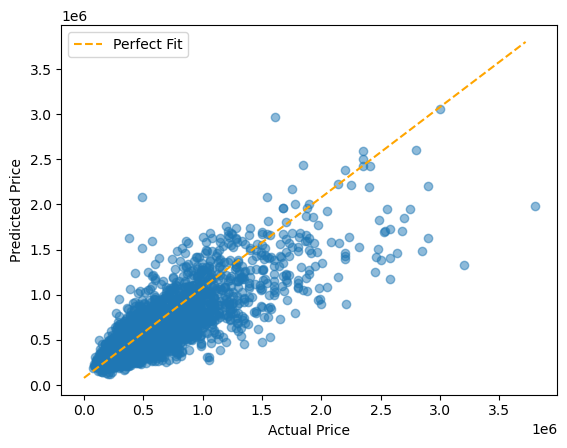

In [135]:
# check whether the linearity assumption holds.
preds = rf.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

> We have some outliers that are all over the place, but in general it looks like we have a linear relationship (not violating this assumption)

### Normality Check (Q-Q plots) 

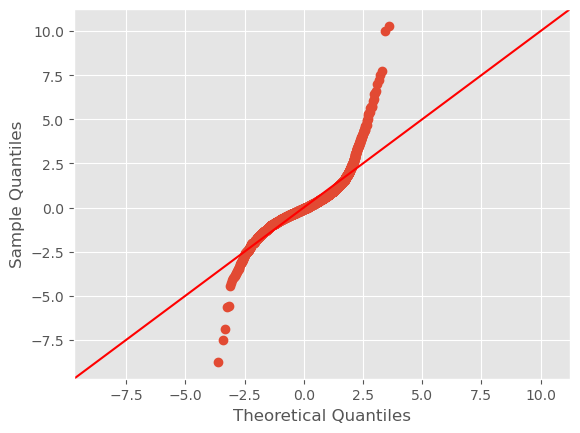

In [136]:
#plot the q-q plots
plt.style.use('ggplot')
residual = (y_test - preds)

fig = sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True)

### Investigating Multicollinearity (Independence Assumption)

In [137]:
#A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.Series(vif, index=X_train.columns, name="Variance Inflation Factor")

log_sqft_living       4.996011
log_sqft_lot          1.658519
log_age               2.673227
log_condition         1.238769
log_grade             2.662365
waterfront_True       1.036569
bedrooms_2           13.797411
bedrooms_3           50.435062
bedrooms_4           37.057872
bedrooms_5            9.369761
bedrooms_6            2.537023
floors_1.5            1.303339
floors_2.0            4.419391
floors_2.5            1.066882
floors_3.0            1.533359
bathrooms_1.0        20.471027
bathrooms_1.5         8.804144
bathrooms_1.75       17.576264
bathrooms_2.0        11.361586
bathrooms_2.25       12.452918
bathrooms_2.5        31.378507
bathrooms_2.75        7.461269
bathrooms_3.0         5.320402
bathrooms_3.25        4.416150
bathrooms_3.5         5.329924
bathrooms_3.75        1.933648
bathrooms_4.0         1.692541
bathrooms_4.25        1.350894
bathrooms_4.5         1.656572
bathrooms_5.0         1.124972
bathrooms_5.25        1.066710
renovated_True        1.144292
has_base

In [138]:
print("The ohe variables have the highest multicollinearity, which is expected, because they belong to the same category.")

The ohe variables have the highest multicollinearity, which is expected, because they belong to the same category.


### Checking Homoscedasticity (Goldfeld-Quandt test)

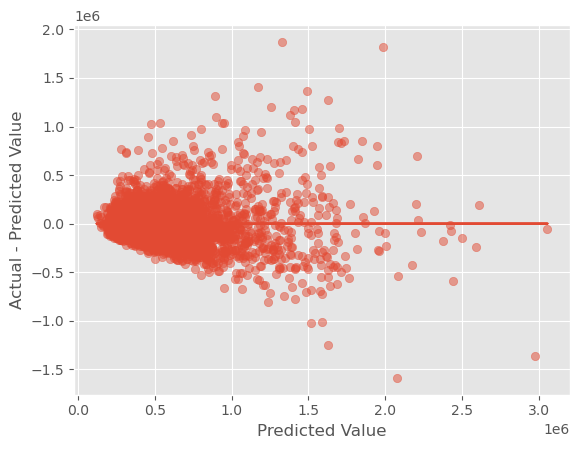

In [139]:
fig, ax = plt.subplots()

residuals = (y_test - preds)
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

> This is not the worst "funnel" shape, although the residuals do seem to differ some based on the predicted price. We are probably violating a strict definition of homoscedasticity.

> Our confidence in these coefficients should not be too high, since we are violating or close to violating more than one of the assumptions of linear regression. This really only should be used for predictive purposes.
A good next step here would be to start trying to figure out why our outliers behave the way they do. Maybe there is some information we could extract from the text features that are currently not part of the model

### Normality Check (Jarque-Bera Test)
> A JB value of roughly 6 or higher indicates that errors are not normally distributed. In other words, this means that the normality null hypothesis has been rejected at the $5\%$ significance level. A value close to 0 on the contrary, indicates the data $is$ normally distributed. 

In [140]:
# JB test for third model
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(y_test - preds)
list(zip(name, test))

[('Jarque-Bera', 39078.39083151774),
 ('Prob', 0.0),
 ('Skew', 1.244362229595617),
 ('Kurtosis', 14.91809628304787)]

> We have a JB value = 44703, which is pretty high (and not in favor of normality), and the p-value of 0.0 is quite low to fail to reject the null hypothesis for normality. Additionally, the kurtosis is above 7, where a kurtosis higher than 3 indicates heavier tails than a normal distribution. 

> The skewness values however show that underlying data is moderately skewed. More-over, a JB p-value much smaller than 0.05 indicates that the normality assumption should definitely be rejected."

### Pickle the Random Forest Model

In [143]:
# Pickle the model
import joblib

# Save object
with open('regression_model.pkl', 'wb') as f:
    joblib.dump(result_3, f)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the trained model
with open('regression_model.pkl', 'rb') as f:
    model = joblib.load(f)

# Get information about the model
n_estimators = model.n_estimators
max_depth = model.max_depth

print(f"Loaded RandomForestRegressor with {n_estimators} trees and max depth of {max_depth}")


# Data Insights and Recommendations

> The purpose of this project was purely predictive. We therefore will give preference to the best performing model, regardless of certain complexities.

1. The best performing model was the Random Forest Regressor with an test R2 of 70% and a RMSE of 189000. 

2. The most important feature in the model is log_grade with an importance score of approximately 0.370. This suggests that variations in the logarithm of the "grade" feature have a significant impact on the model's predictions.

3. The second most important feature is log_sqft_living with an importance score of approximately 0.255. This indicates that the logarithm of the "square footage of living area" feature is also a strong predictor.

4. Similarly, log_age and log_sqft_lot have importance scores of approximately 0.132 and 0.079, respectively, suggesting they contribute significantly to the model's predictions.

5. Categorical features like waterfront_True, has_basement_True, and various bathroom and bedroom counts also contribute to the model's predictions, but to a lesser extent compared to the logarithm-transformed continuous features.

It's important to note that feature importances provide a relative ranking of features within the context of the specific model. These scores do not directly indicate the direction or magnitude of the relationship between each feature and the target variable. They are useful for feature selection, understanding model behavior, and identifying potentially important features for further analysis.
